# This code is to get the labeled_energy_data csv file of each model

## 对数据进行分析,展示出来的内容包括:
### 1. 每个模型在 5 个 epochs 下的每个能耗数据点

## Import the lib

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from Functions.PlotAnalysis import *

## Function in use

### preset the color and marker

In [13]:
# Create a color map and marker map for the steps
step_colors = {
    'idle': 'gray',
    'to_device': 'blue',
    'forward': 'green',
    'loss': 'red',
    'backward': 'purple',
    'optimize': 'orange'
}
step_markers = {
    'idle': 'o',
    'to_device': 's',
    'forward': '^',
    'loss': 'D',
    'backward': 'x',
    'optimize': 'P'
}

### plot with different model

In [14]:
def plot_model(modelname, model_data_folder_list, plot_folder):

    model_data_path = [model_data_folder_list[i] for i in range(len(model_data_folder_list)) if f'{modelname}' in model_data_folder_list[i]][0]
    energy_data, labeled_energy_data, to_device, forward, loss, backward, optimize, \
    to_device_energy, forward_energy, loss_energy, backward_energy, optimize_energy = load_data(model_data_path)

    plot_energy_data(labeled_energy_data, step_colors, step_markers, modelname, plot_folder)
    plot_period_energy_data(labeled_energy_data, step_colors, modelname, plot_folder)
    plot_batch_step_energy(to_device_energy, forward_energy, 
                           loss_energy, backward_energy, 
                           optimize_energy, step_colors, modelname, plot_folder)
    plot_step_energy_distribution(to_device_energy, forward_energy, 
                                  loss_energy, backward_energy, 
                                  optimize_energy, step_colors, modelname, plot_folder)
    plot_step_energy_distribution_bar(to_device_energy, forward_energy, 
                                      loss_energy, backward_energy, 
                                      optimize_energy, modelname, plot_folder)
    energy_batch_mean, energy_batch_std = plot_epoch_step_energy(to_device_energy, forward_energy, 
                                                                 loss_energy, backward_energy, 
                                                                 optimize_energy, step_colors, modelname, plot_folder)
    plot_epoch_step_time(to_device_energy, forward_energy, 
                         loss_energy, backward_energy, 
                         optimize_energy, step_colors, modelname, plot_folder)
    plot_step_time_distribution(to_device_energy, forward_energy, 
                                loss_energy, backward_energy, 
                                optimize_energy, step_colors, modelname, plot_folder)
    plot_step_time_distribution_box(to_device_energy, forward_energy, 
                                    loss_energy, backward_energy, 
                                    optimize_energy,step_colors, step_markers, modelname, plot_folder)

    return energy_batch_mean, energy_batch_std      # return the mean and std of the energy consumption of each step in each batch

    

## find the data path

In [15]:
current_path = os.getcwd()
data_path = os.path.join(current_path, 'CNNModelsData')
data_folders = os.listdir(data_path)
print(data_folders)

# create a forlder to save the plots
plots_name = ['Plots_fashion_mnist', 'Plots_cifar100']
# plot_folder = os.path.join(current_path, plots_name[0])
plot_folder = os.path.join(current_path, plots_name[1])
print(plot_folder)
if not os.path.exists(plot_folder):
    os.makedirs(plot_folder)

['googlenet_origin', 'resnet50', 'resnet34', 'mobilenetv2', 'vgg13', 'googlenet_mod7', 'googlenet_mod9', 'googlenet_mod8', 'googlenet_mod1', 'googlenet_mod6', 'resnet18', 'mobilenetv1', 'vgg16', 'vgg11', 'googlenet_mod3', 'googlenet_mod4', 'googlenet_mod5', 'googlenet_mod2', 'alexnet']
/Users/dtjgp/Projects/GreenAI/4090/Plots_cifar100


## load all the model data

In [16]:
# set the epoch number, batch size and the round number as well as the sampling rate
epoch = 5
batch_size = 128
round_num = 0
sampling_rate = 2

In [17]:
# for all the folder names in the data folder, generate the path to the folder
# and print the path
folder_name = f'E{epoch}_B{batch_size}_R{round_num}_SR{sampling_rate}'
print(folder_name)

# data_dir = 'fashion_mnist'
data_dir = 'cifar100'
model_data_folder_list = []
for folder in data_folders:
    folder_path = os.path.join(data_path, folder)
    folder_path = os.path.join(folder_path, data_dir)
    folder_path = os.path.join(folder_path, folder_name)
    
    print(folder_path)
    model_data_folder_list.append(folder_path)

print(model_data_folder_list)

E5_B128_R0_SR2
/Users/dtjgp/Projects/GreenAI/4090/CNNModelsData/googlenet_origin/cifar100/E5_B128_R0_SR2
/Users/dtjgp/Projects/GreenAI/4090/CNNModelsData/resnet50/cifar100/E5_B128_R0_SR2
/Users/dtjgp/Projects/GreenAI/4090/CNNModelsData/resnet34/cifar100/E5_B128_R0_SR2
/Users/dtjgp/Projects/GreenAI/4090/CNNModelsData/mobilenetv2/cifar100/E5_B128_R0_SR2
/Users/dtjgp/Projects/GreenAI/4090/CNNModelsData/vgg13/cifar100/E5_B128_R0_SR2
/Users/dtjgp/Projects/GreenAI/4090/CNNModelsData/googlenet_mod7/cifar100/E5_B128_R0_SR2
/Users/dtjgp/Projects/GreenAI/4090/CNNModelsData/googlenet_mod9/cifar100/E5_B128_R0_SR2
/Users/dtjgp/Projects/GreenAI/4090/CNNModelsData/googlenet_mod8/cifar100/E5_B128_R0_SR2
/Users/dtjgp/Projects/GreenAI/4090/CNNModelsData/googlenet_mod1/cifar100/E5_B128_R0_SR2
/Users/dtjgp/Projects/GreenAI/4090/CNNModelsData/googlenet_mod6/cifar100/E5_B128_R0_SR2
/Users/dtjgp/Projects/GreenAI/4090/CNNModelsData/resnet18/cifar100/E5_B128_R0_SR2
/Users/dtjgp/Projects/GreenAI/4090/CNNModelsD

## plot all the models

The current model is googlenet_origin


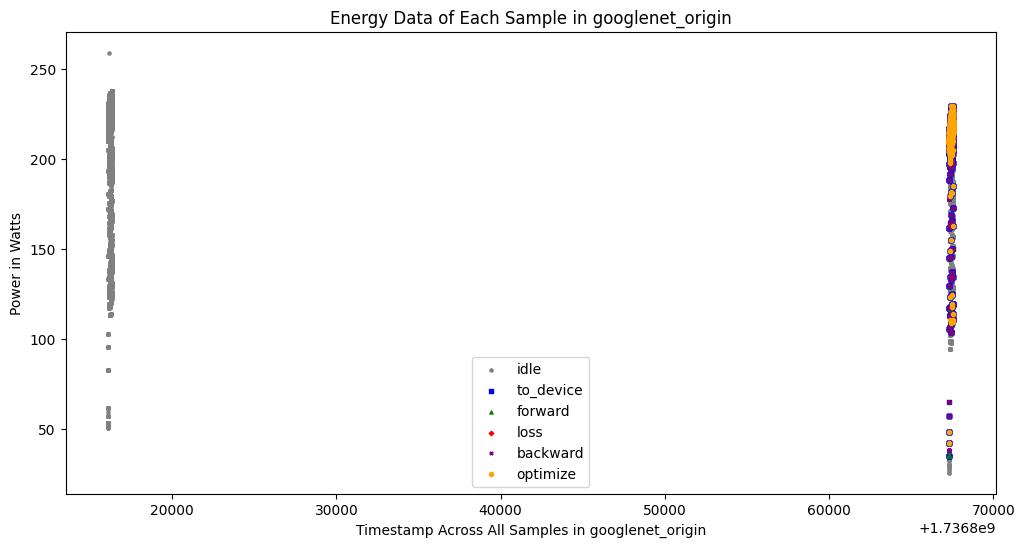

<Figure size 640x480 with 0 Axes>

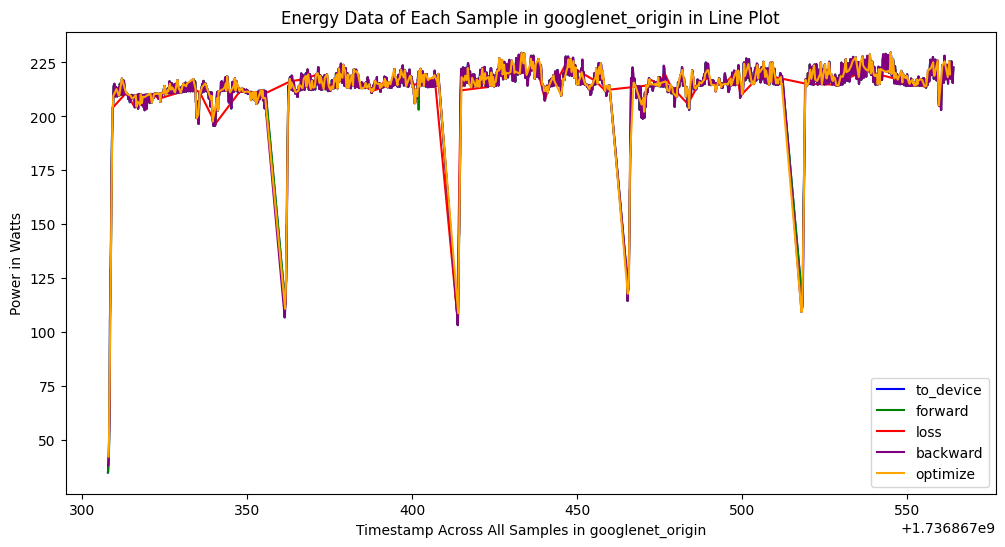

<Figure size 640x480 with 0 Axes>

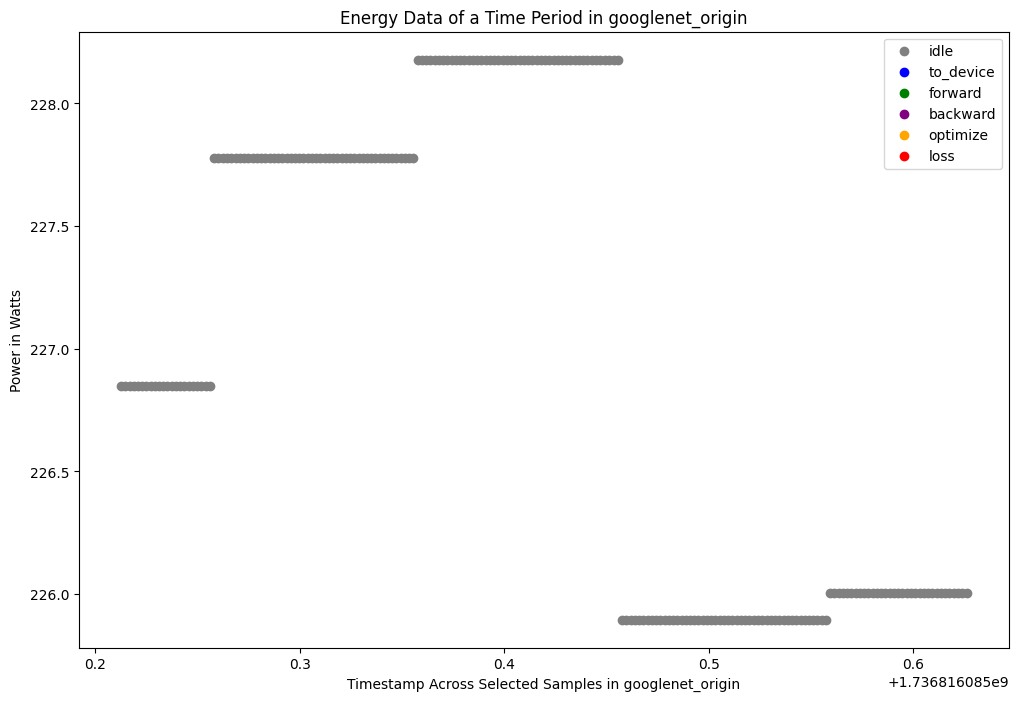

<Figure size 640x480 with 0 Axes>

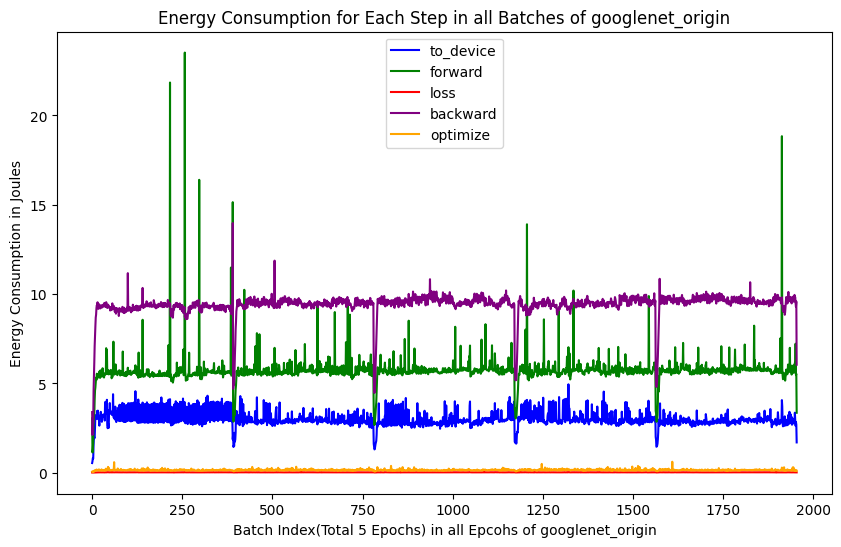

<Figure size 640x480 with 0 Axes>

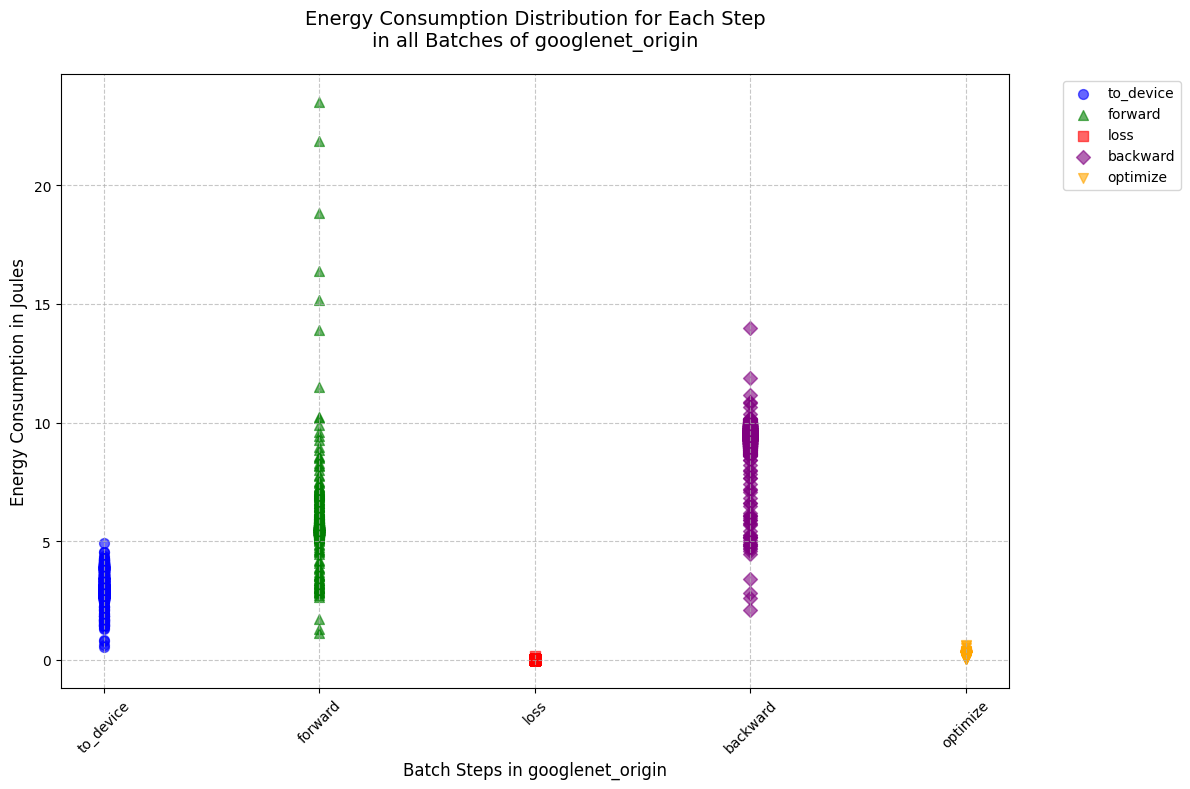

<Figure size 640x480 with 0 Axes>

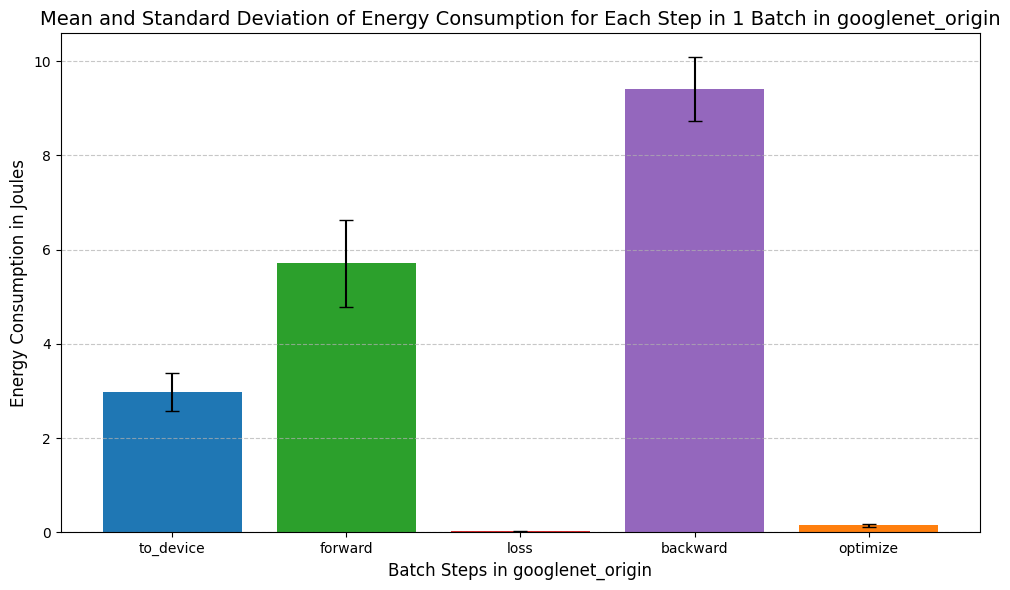

<Figure size 640x480 with 0 Axes>

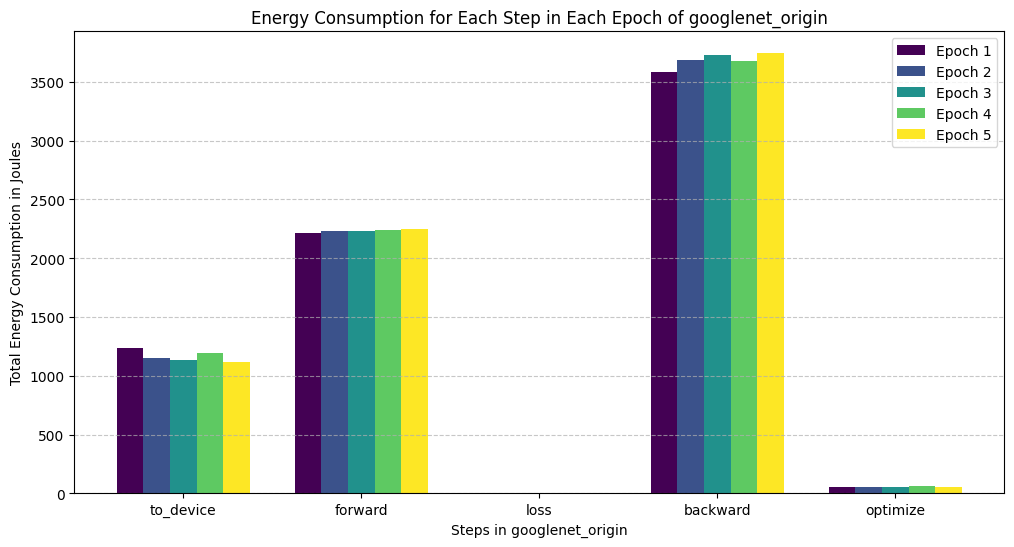

<Figure size 640x480 with 0 Axes>

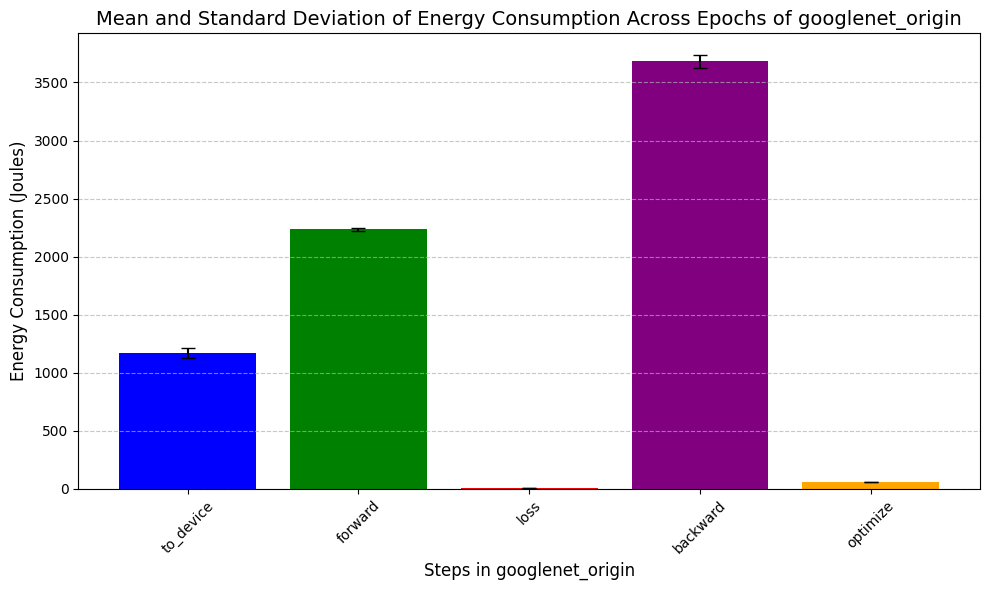

<Figure size 640x480 with 0 Axes>

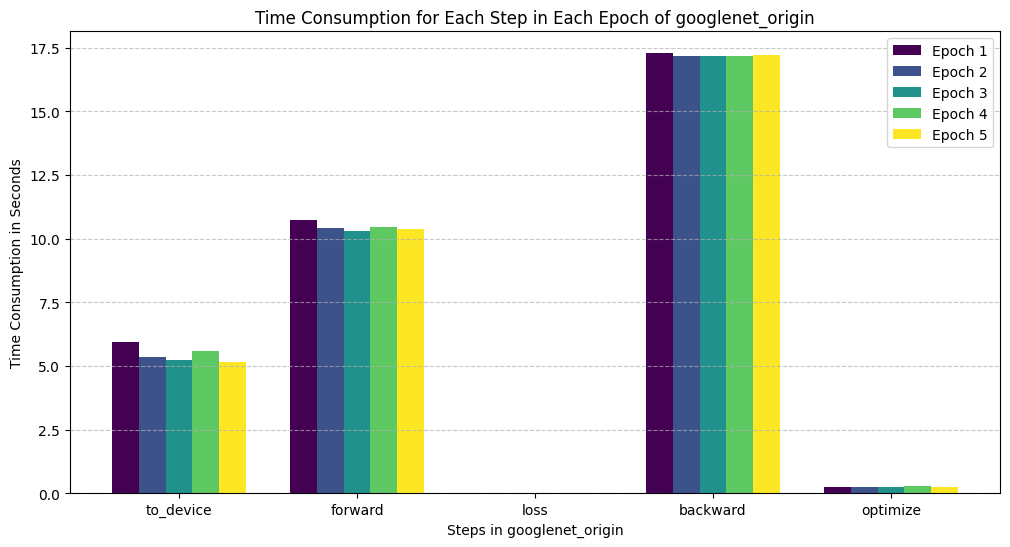

<Figure size 640x480 with 0 Axes>

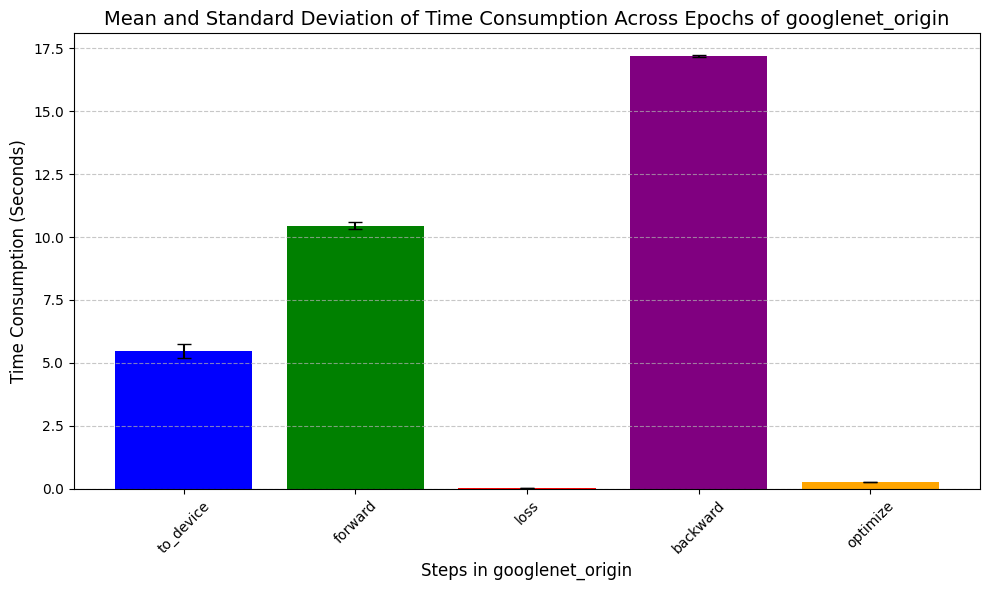

<Figure size 640x480 with 0 Axes>

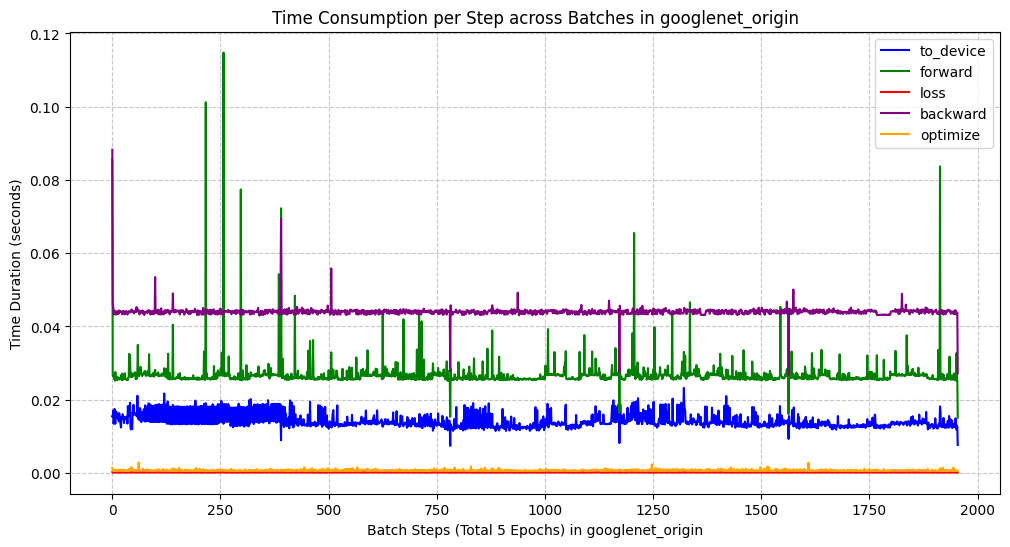

<Figure size 640x480 with 0 Axes>

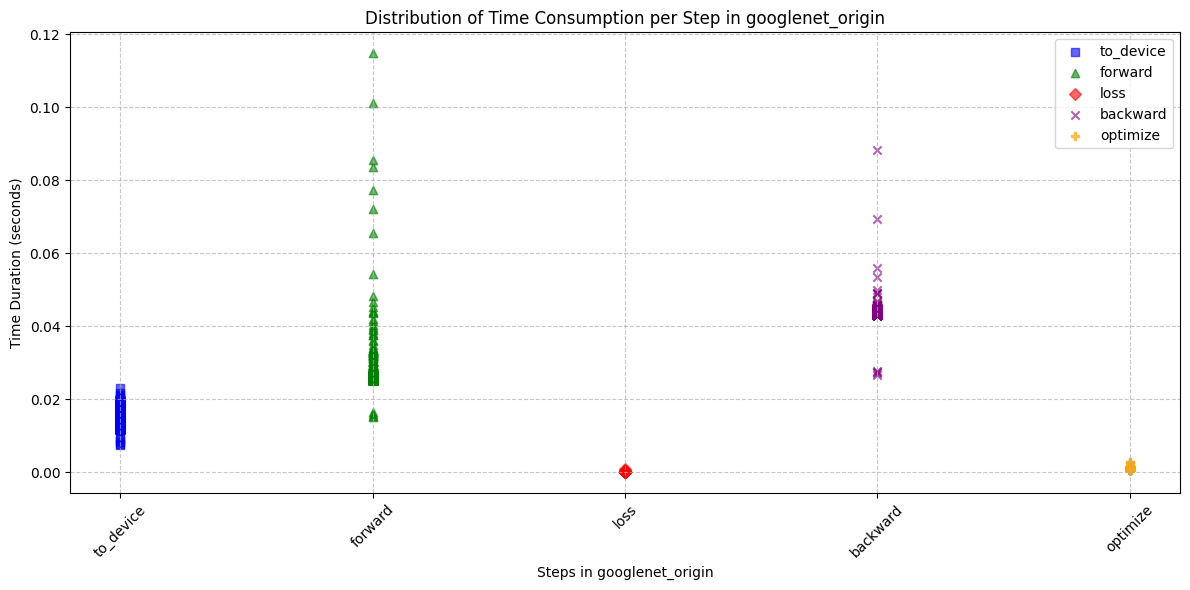

The current model is resnet50


/Users/dtjgp/Projects/GreenAI/4090/Functions/PlotAnalysis.py:86: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  energy_data = pd.read_csv(os.path.join(model_path, 'energy_consumption_file.csv'))


<Figure size 640x480 with 0 Axes>

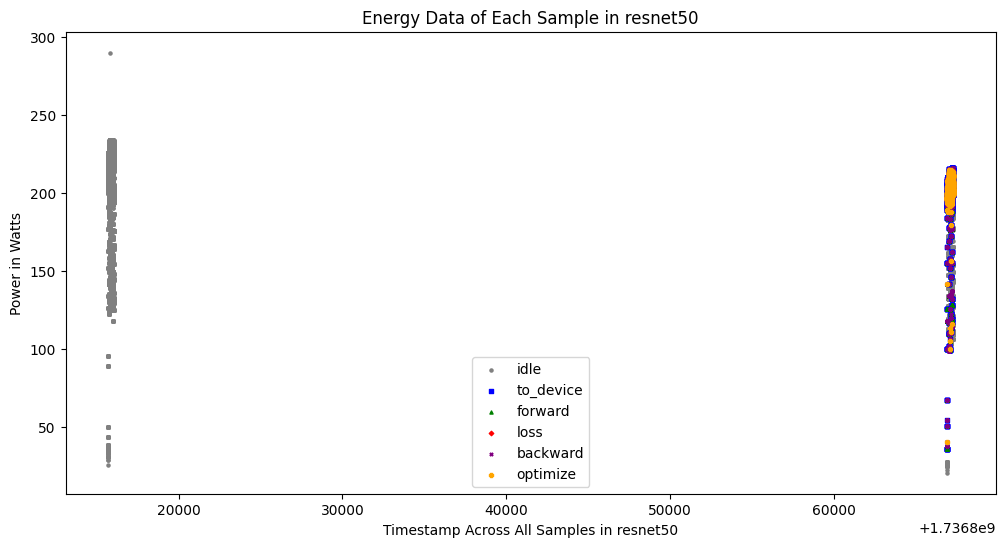

<Figure size 640x480 with 0 Axes>

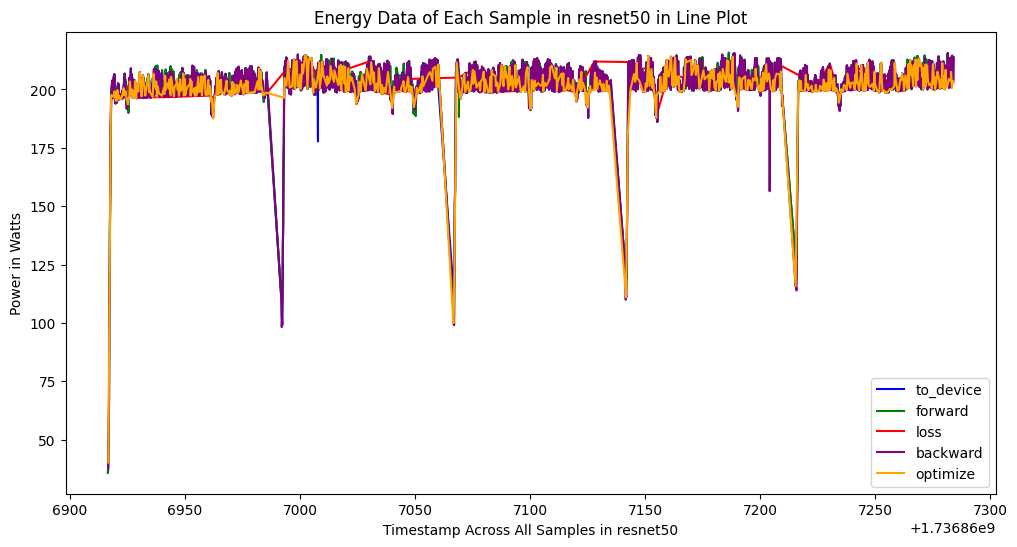

<Figure size 640x480 with 0 Axes>

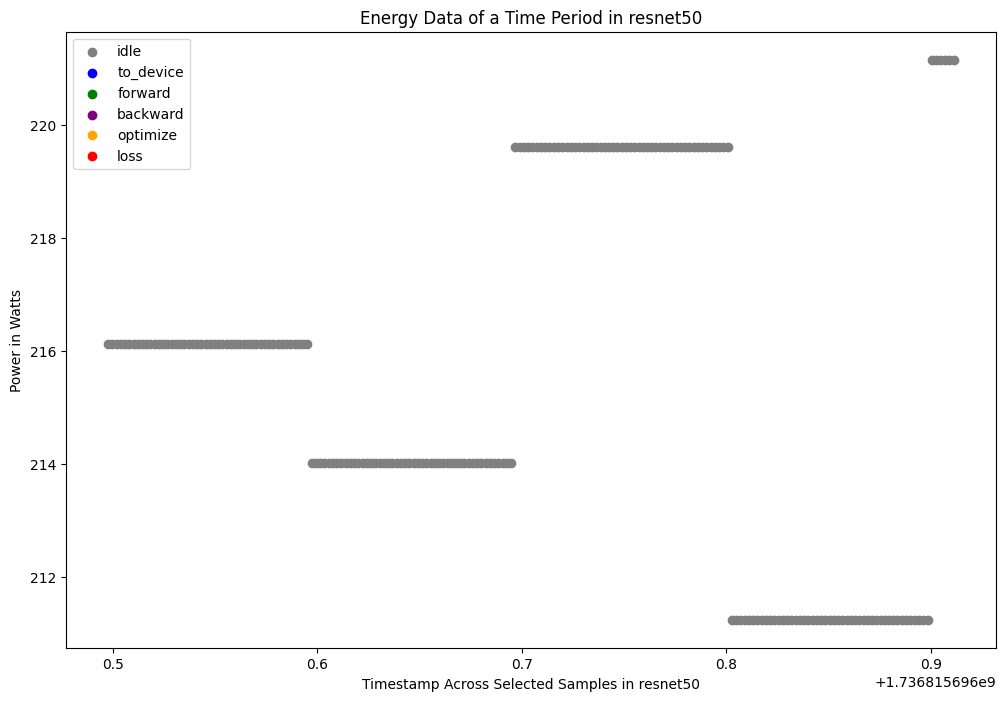

<Figure size 640x480 with 0 Axes>

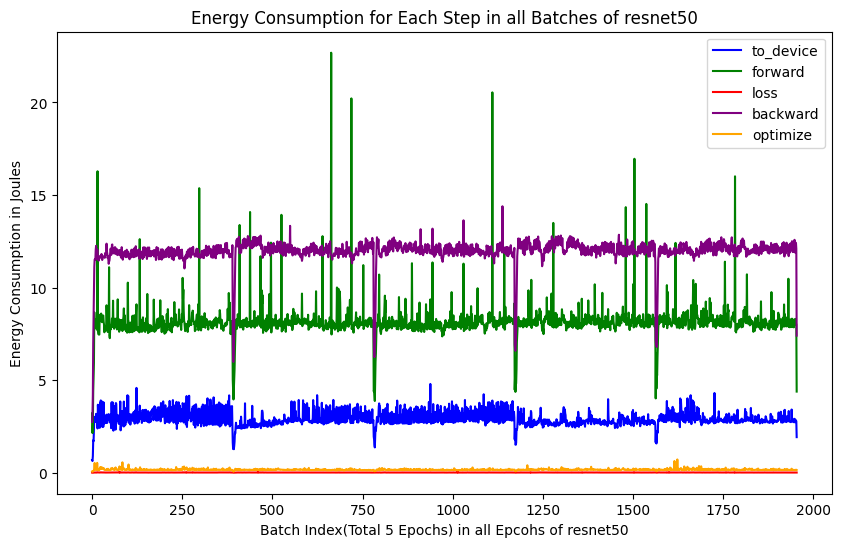

<Figure size 640x480 with 0 Axes>

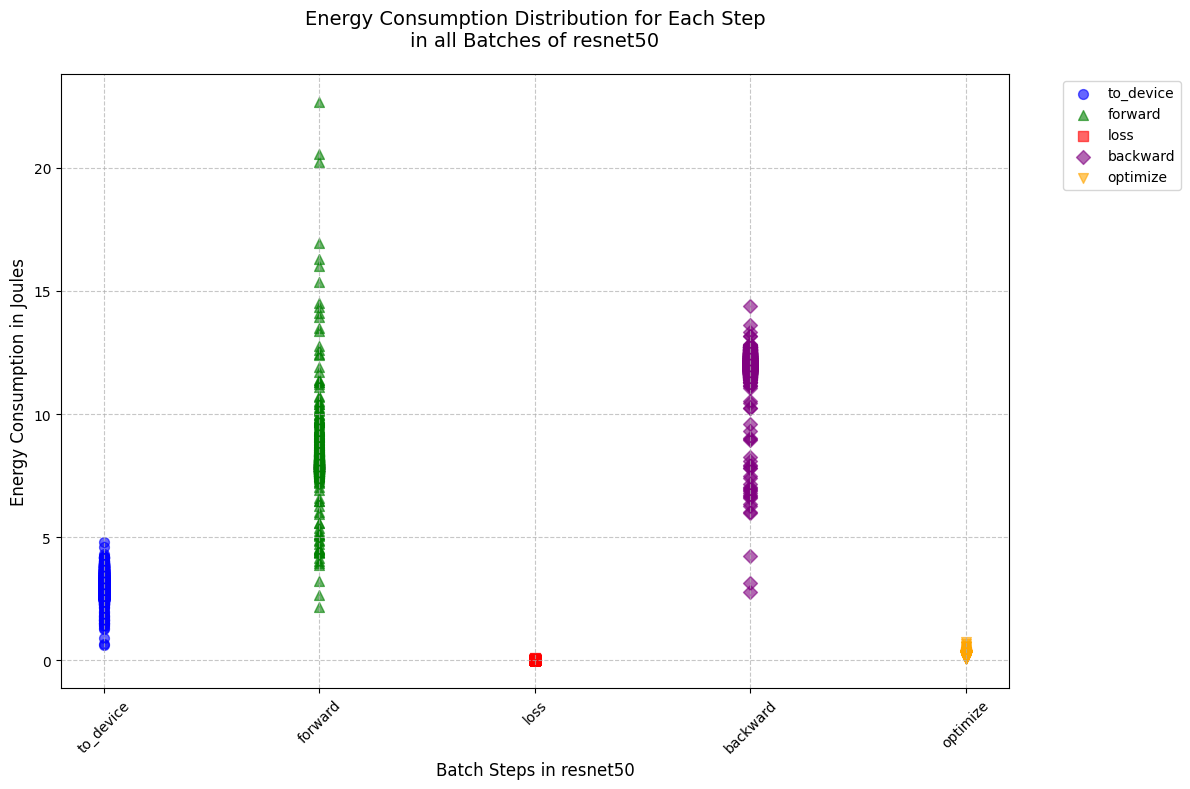

<Figure size 640x480 with 0 Axes>

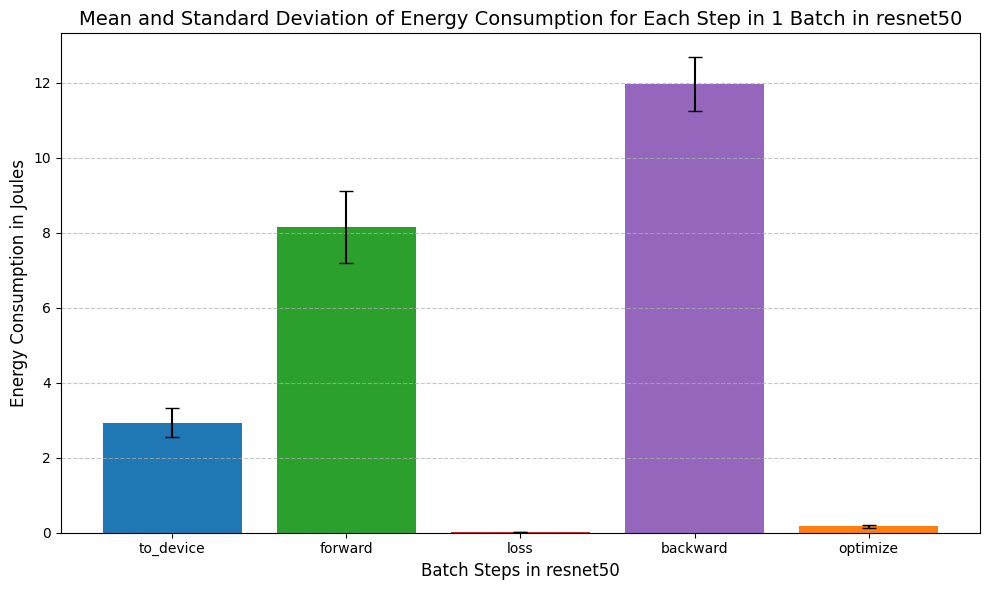

<Figure size 640x480 with 0 Axes>

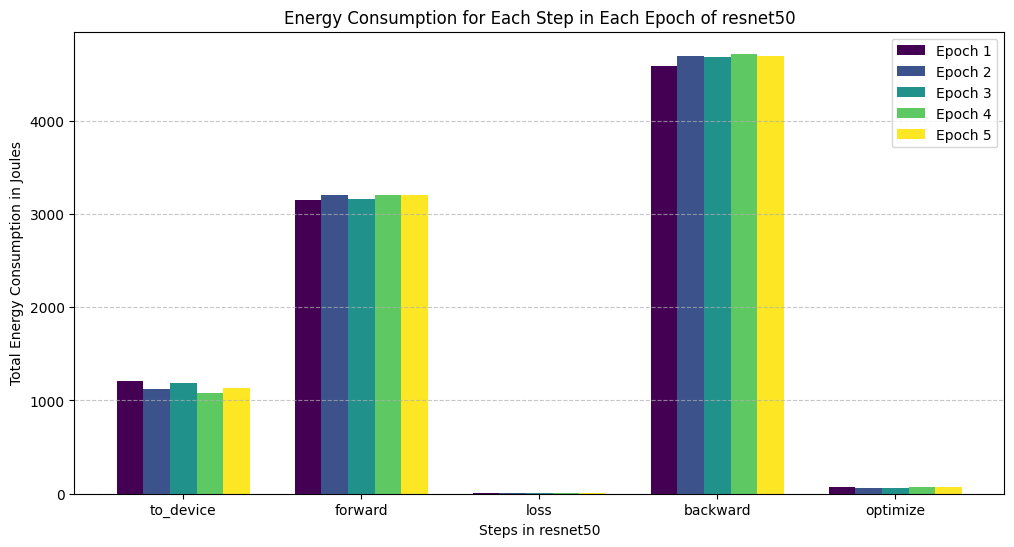

<Figure size 640x480 with 0 Axes>

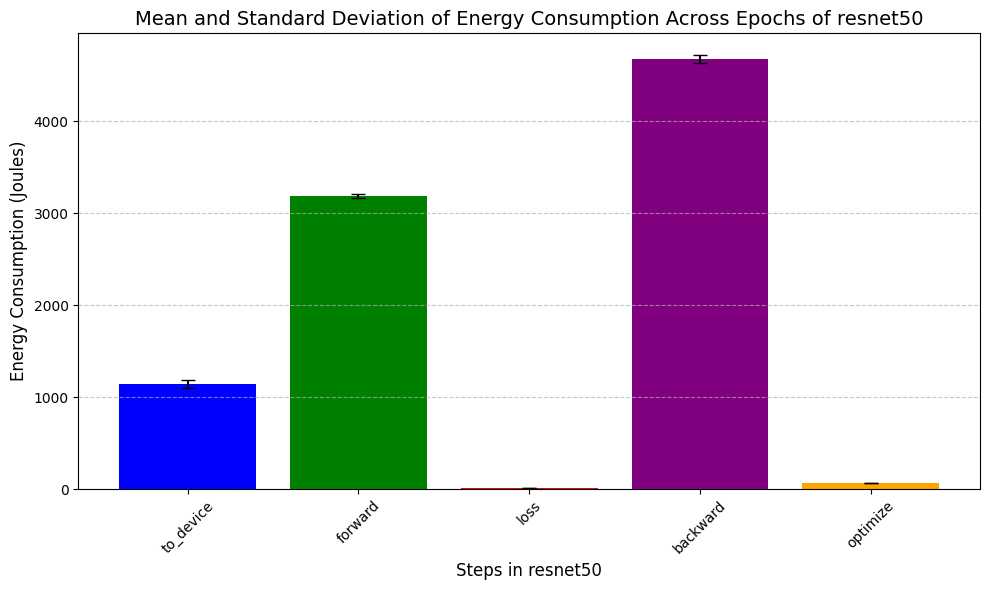

<Figure size 640x480 with 0 Axes>

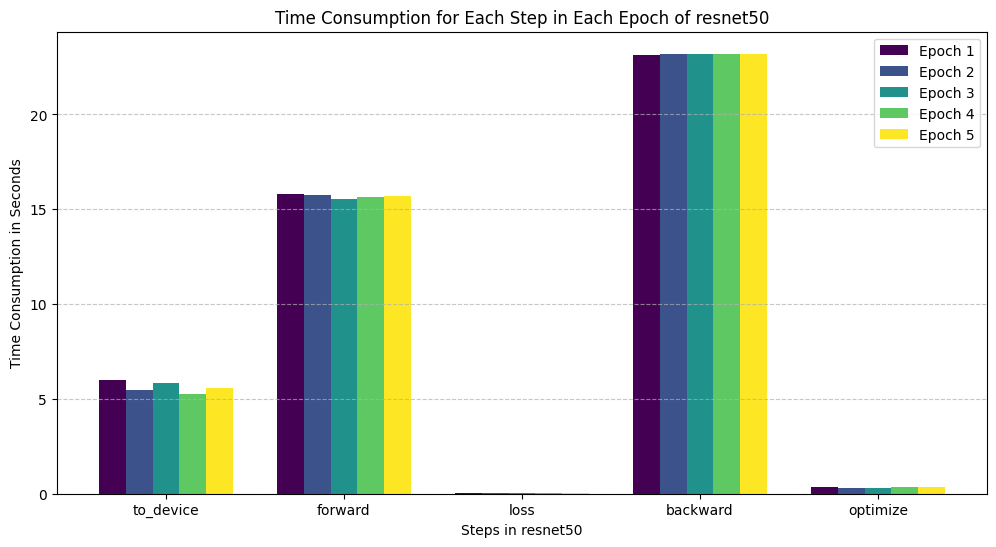

<Figure size 640x480 with 0 Axes>

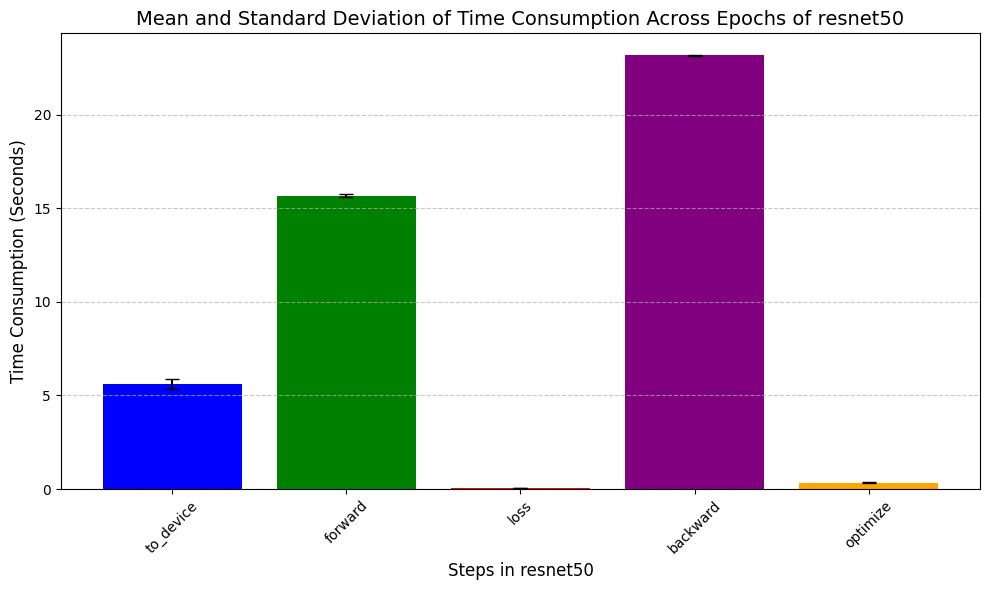

<Figure size 640x480 with 0 Axes>

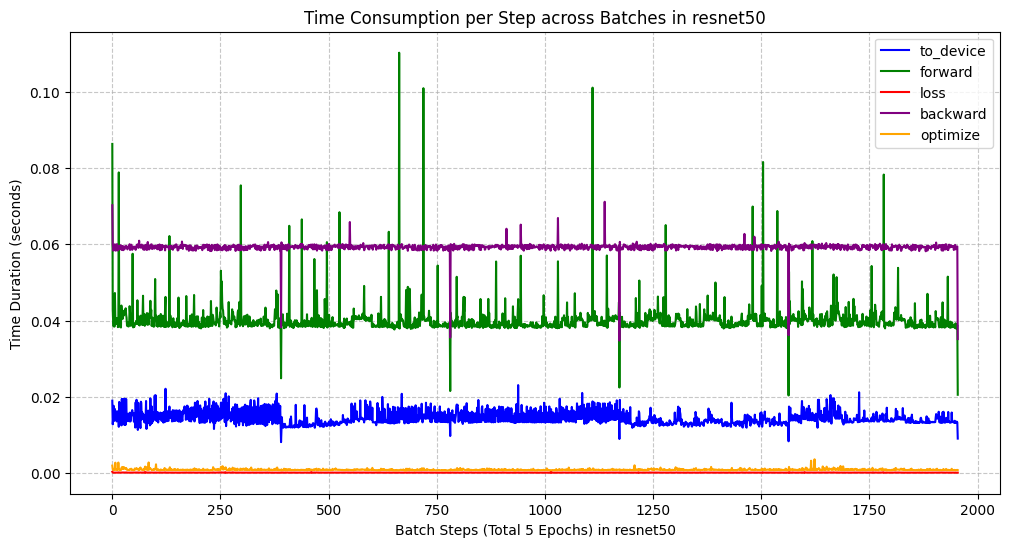

<Figure size 640x480 with 0 Axes>

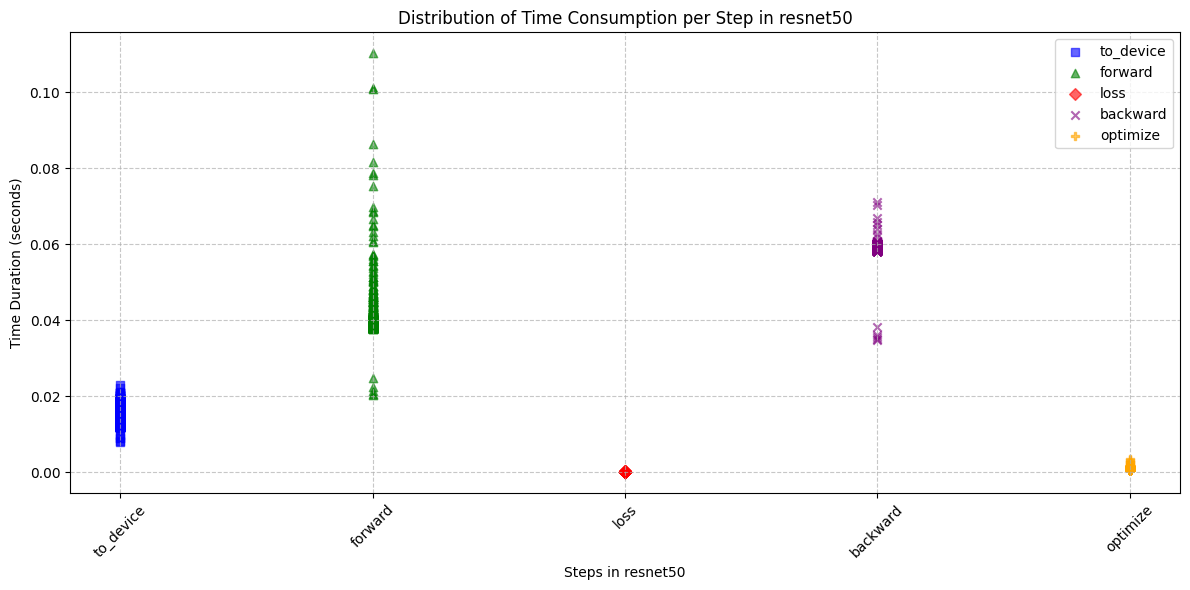

The current model is resnet34


/Users/dtjgp/Projects/GreenAI/4090/Functions/PlotAnalysis.py:86: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  energy_data = pd.read_csv(os.path.join(model_path, 'energy_consumption_file.csv'))


<Figure size 640x480 with 0 Axes>

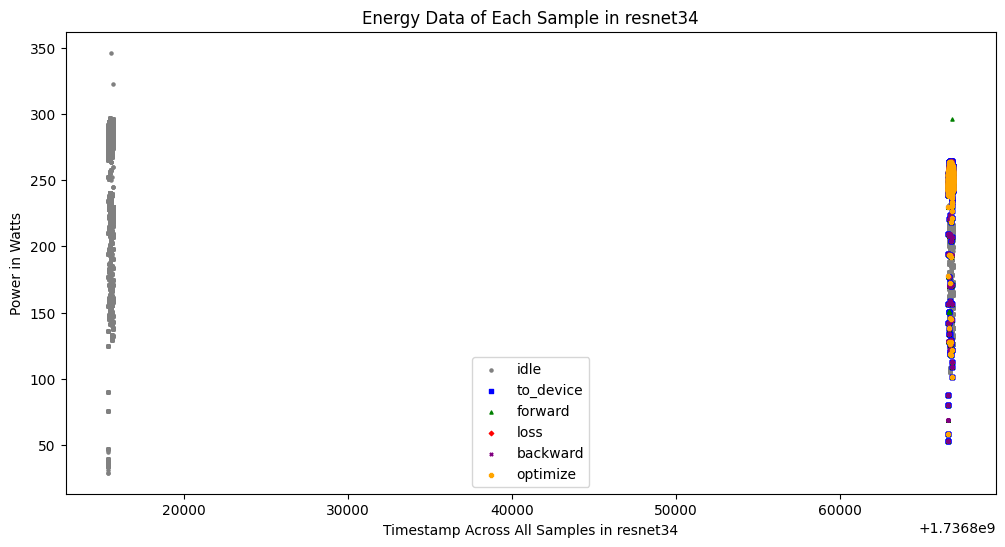

<Figure size 640x480 with 0 Axes>

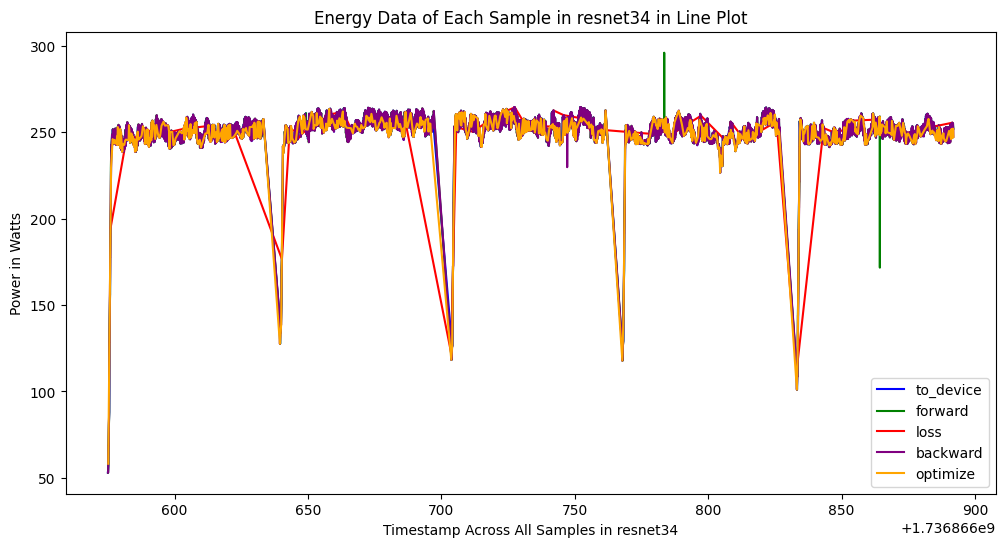

<Figure size 640x480 with 0 Axes>

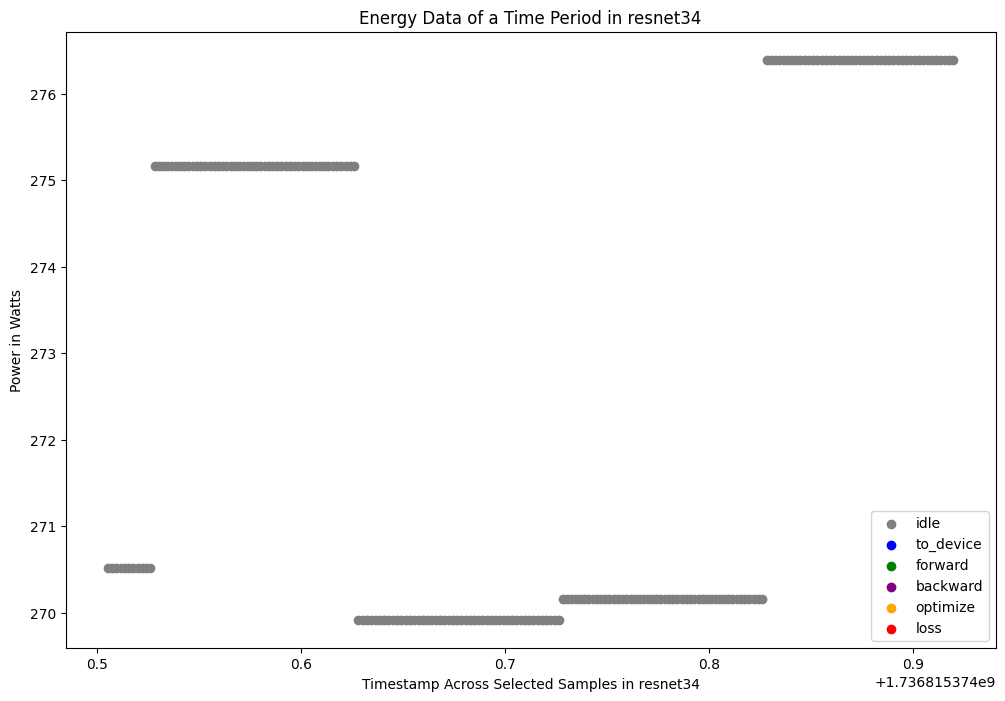

<Figure size 640x480 with 0 Axes>

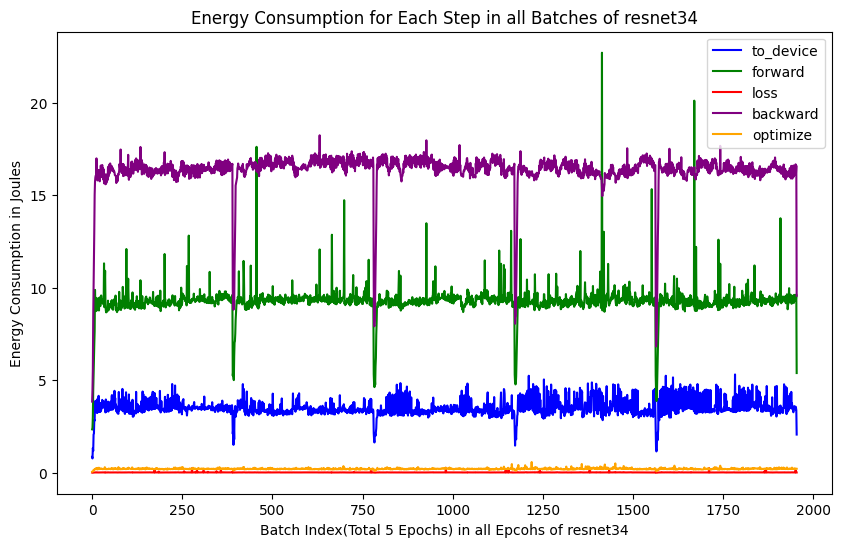

<Figure size 640x480 with 0 Axes>

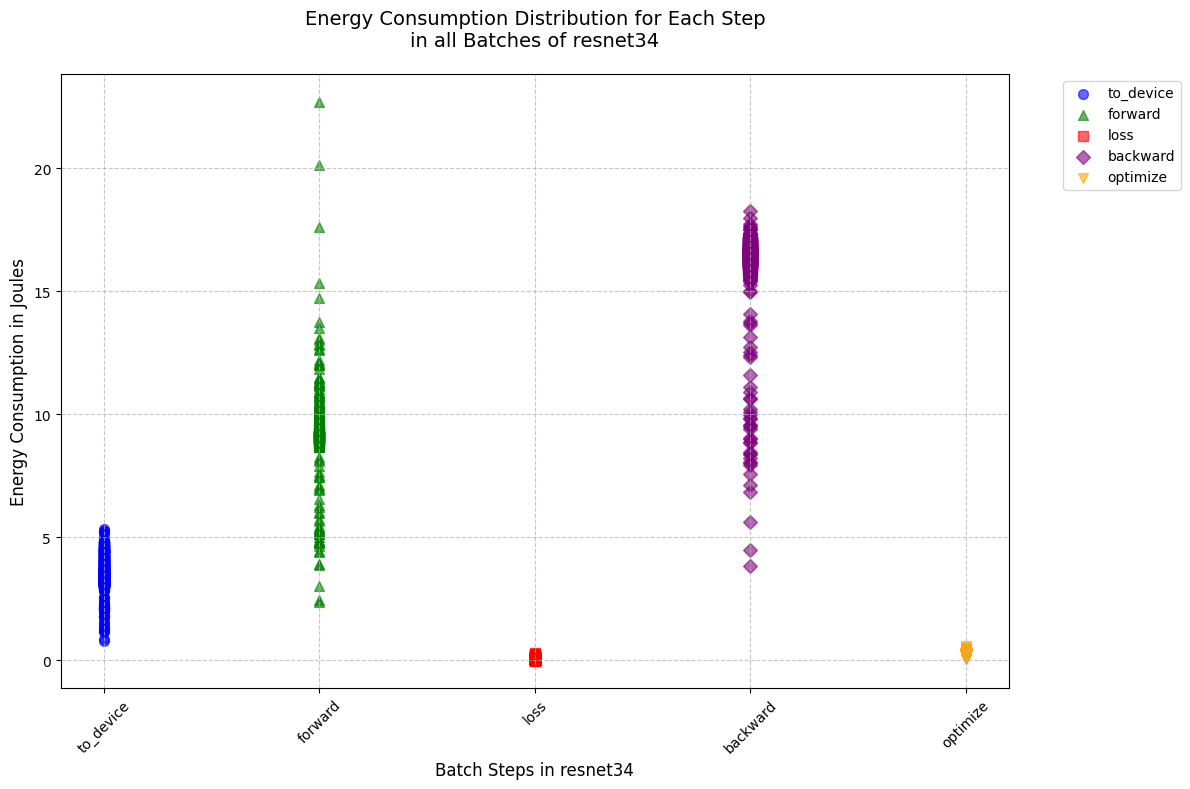

<Figure size 640x480 with 0 Axes>

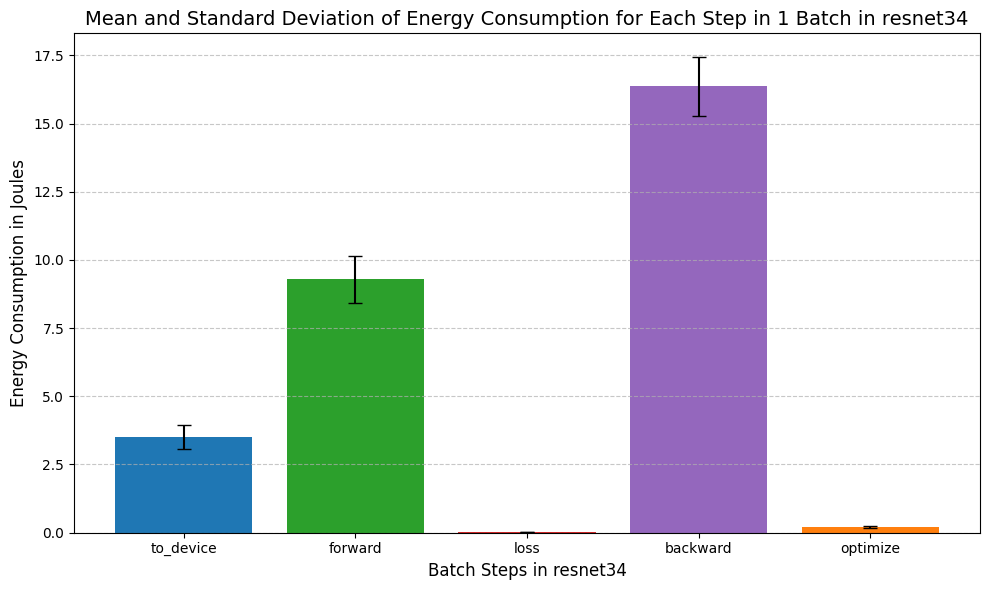

<Figure size 640x480 with 0 Axes>

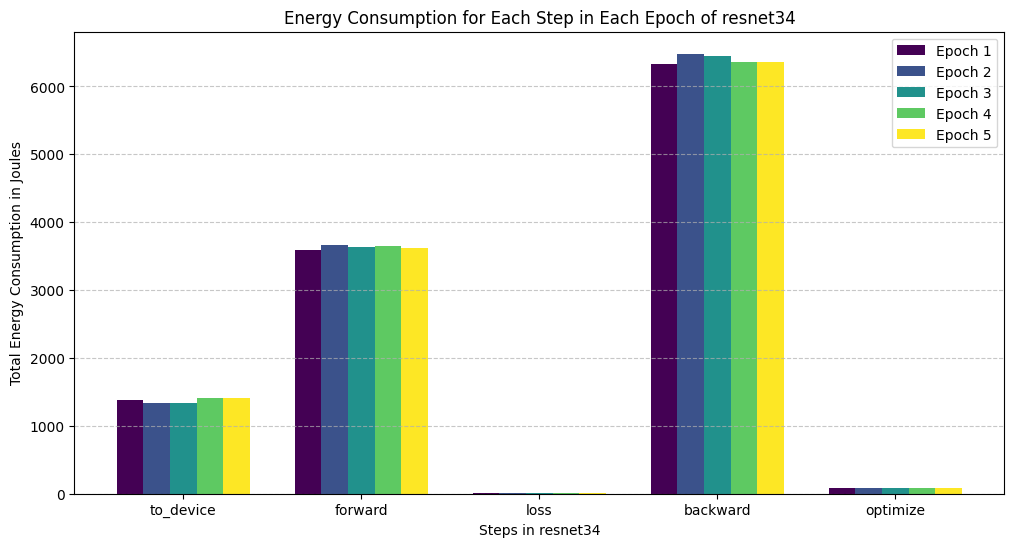

<Figure size 640x480 with 0 Axes>

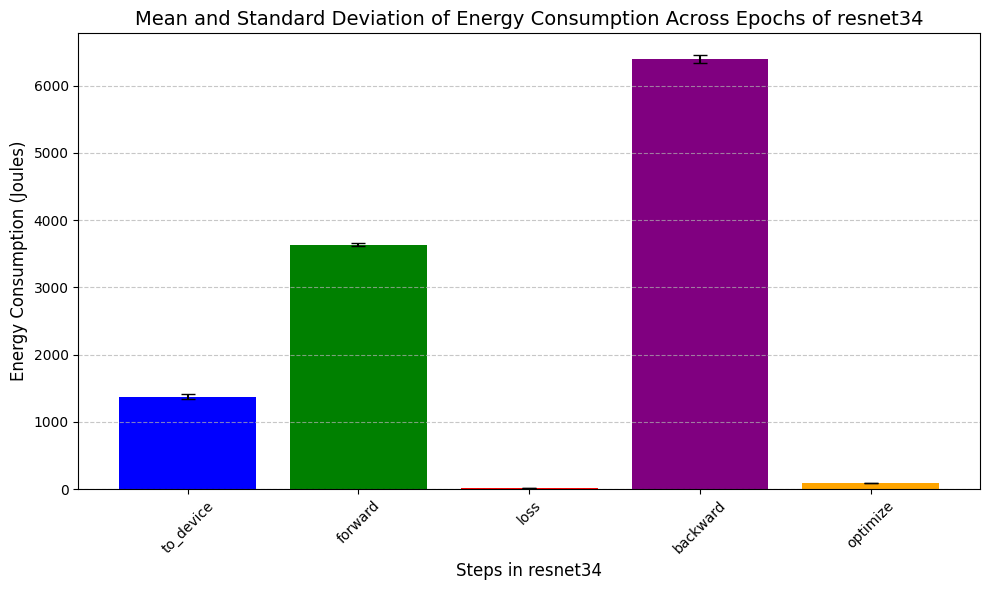

<Figure size 640x480 with 0 Axes>

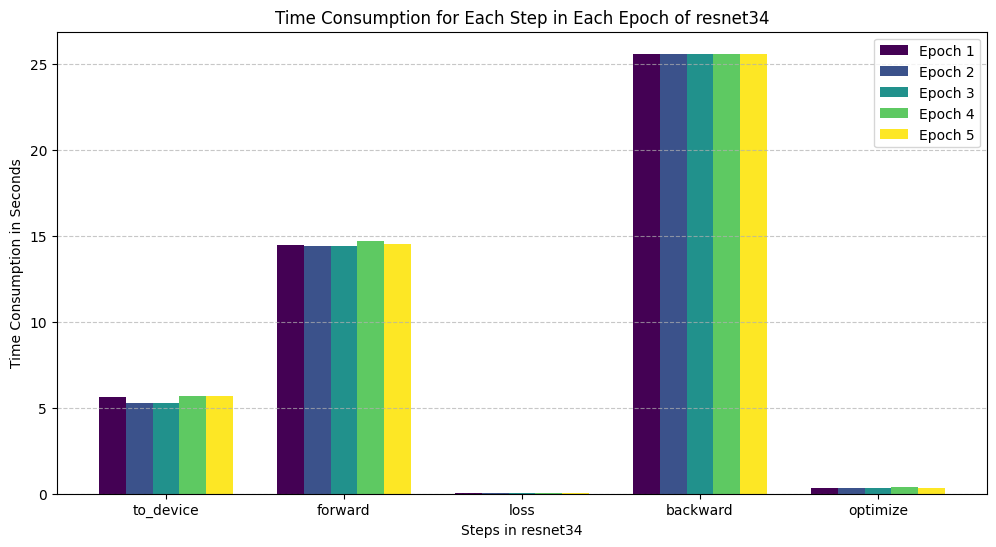

<Figure size 640x480 with 0 Axes>

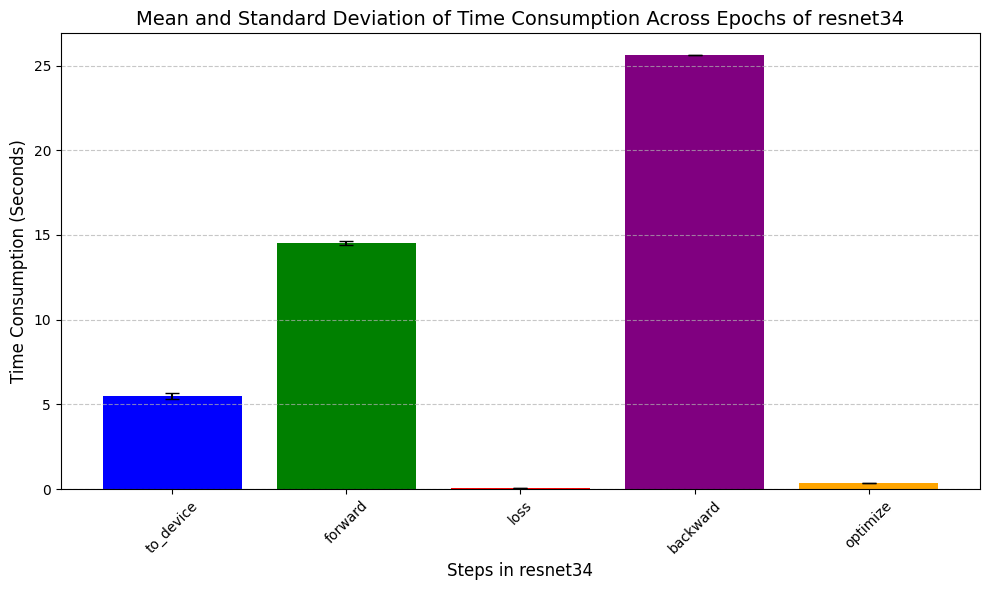

<Figure size 640x480 with 0 Axes>

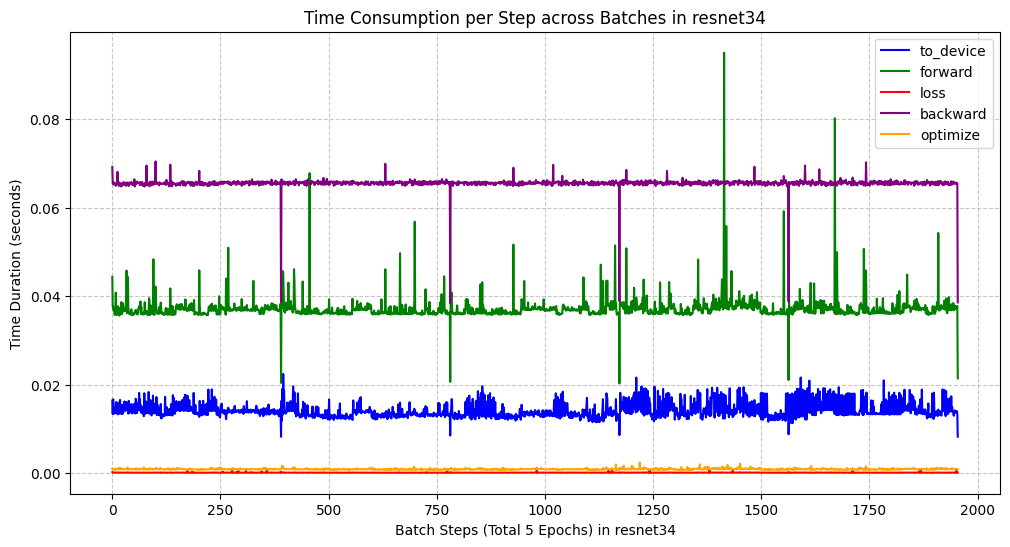

<Figure size 640x480 with 0 Axes>

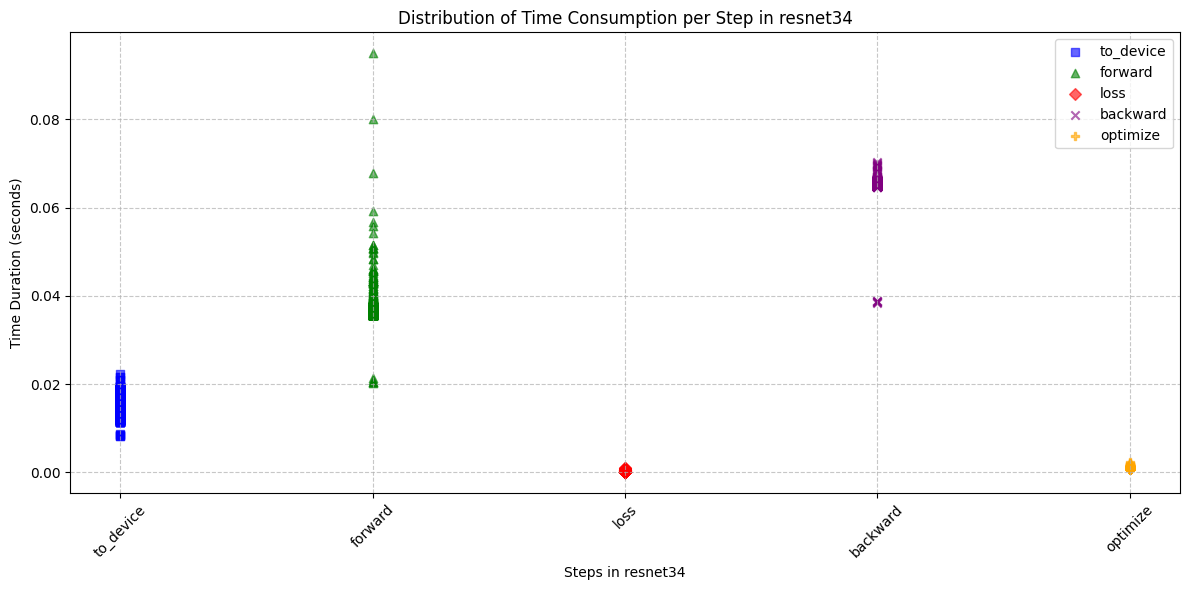

The current model is mobilenetv2


<Figure size 640x480 with 0 Axes>

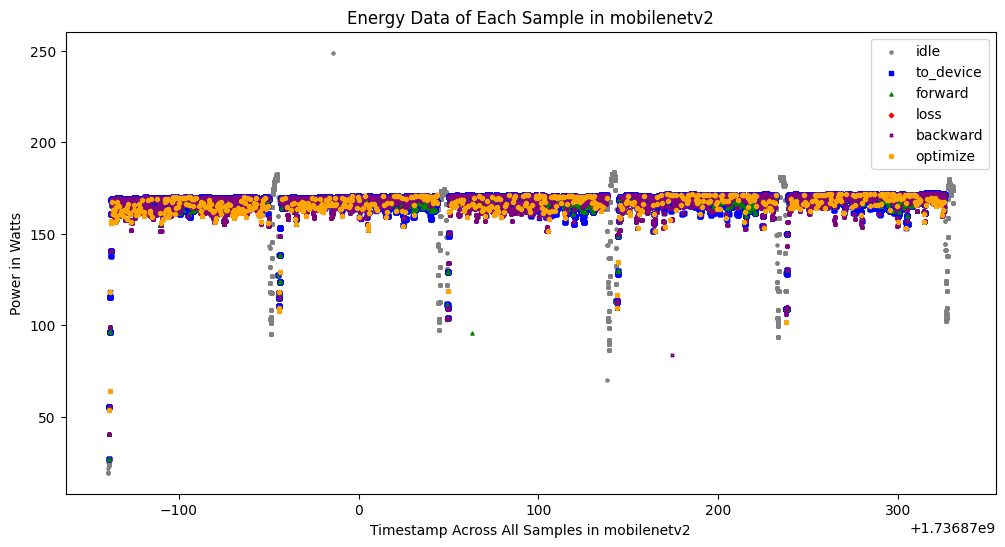

<Figure size 640x480 with 0 Axes>

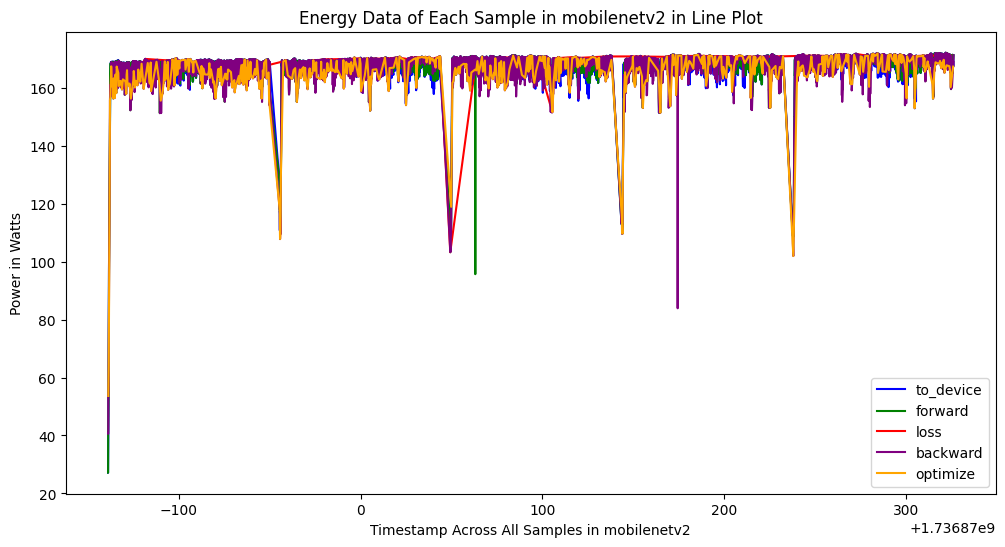

<Figure size 640x480 with 0 Axes>

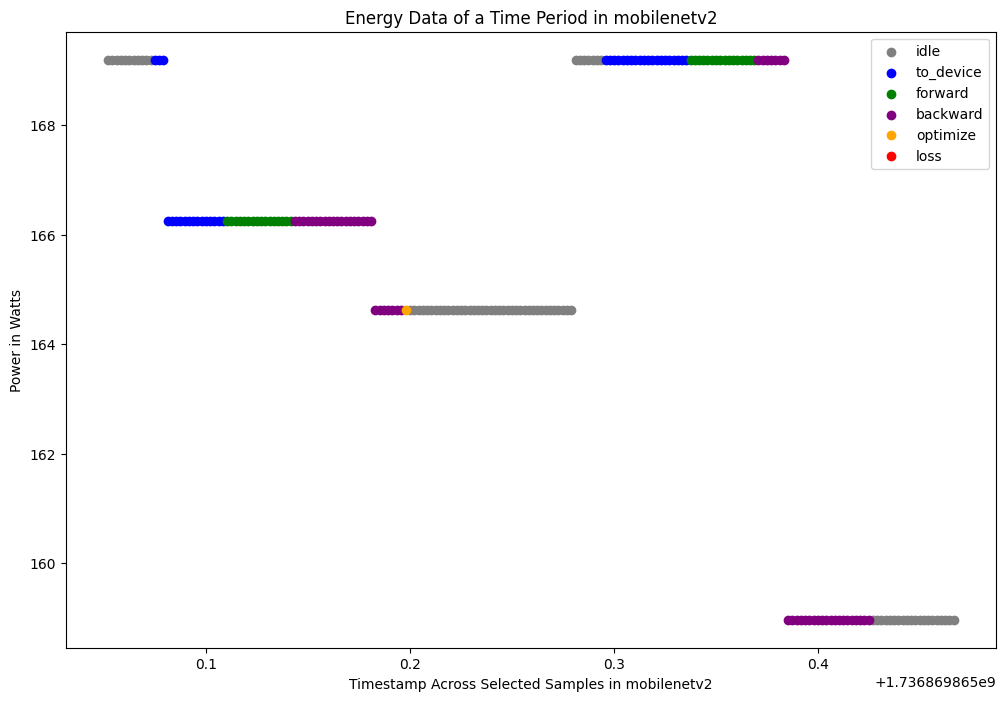

<Figure size 640x480 with 0 Axes>

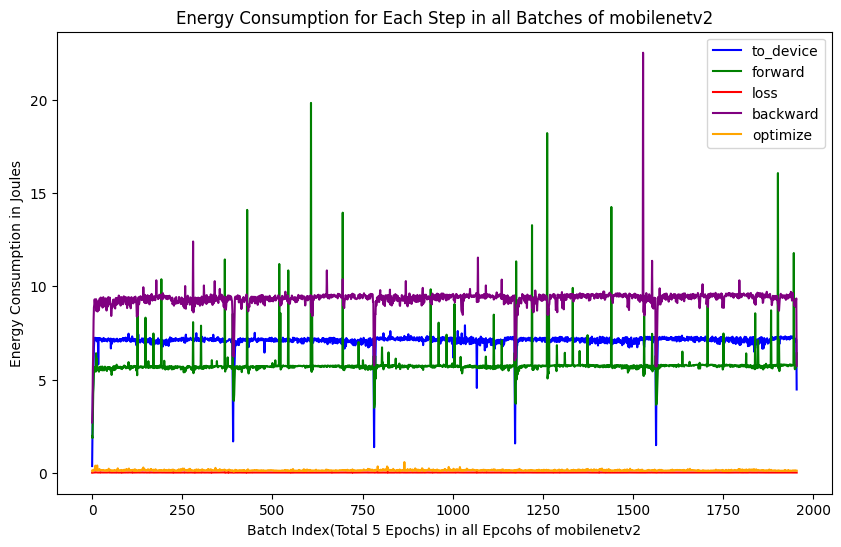

<Figure size 640x480 with 0 Axes>

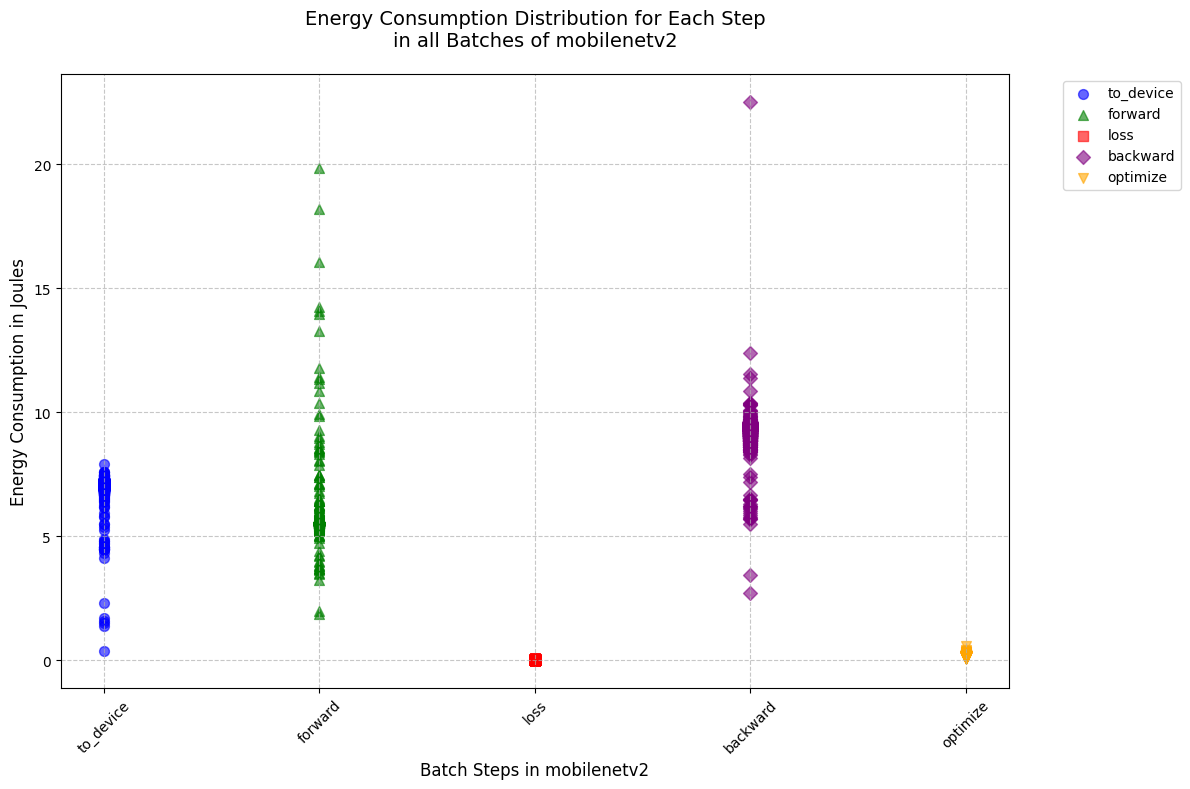

<Figure size 640x480 with 0 Axes>

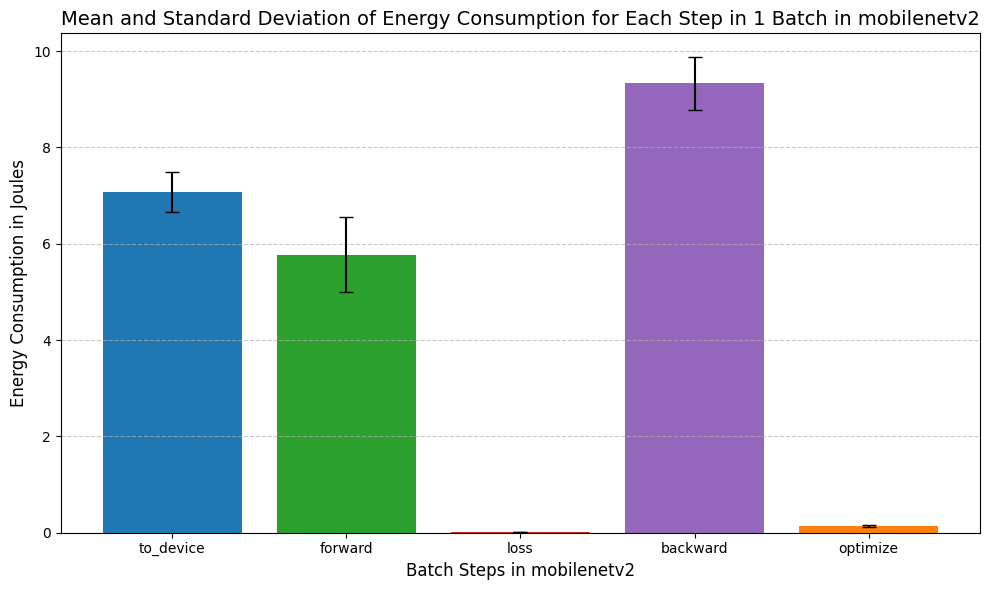

<Figure size 640x480 with 0 Axes>

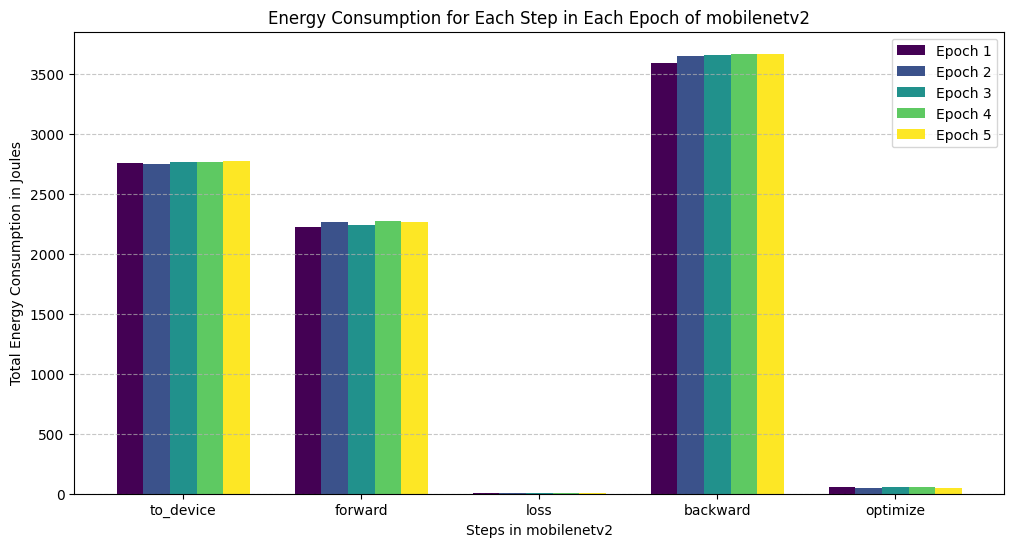

<Figure size 640x480 with 0 Axes>

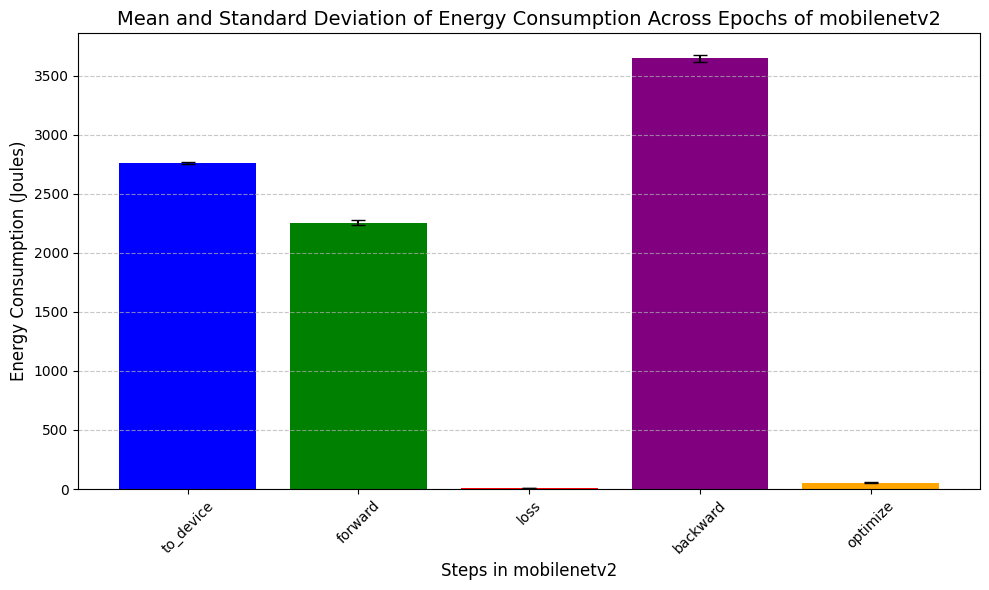

<Figure size 640x480 with 0 Axes>

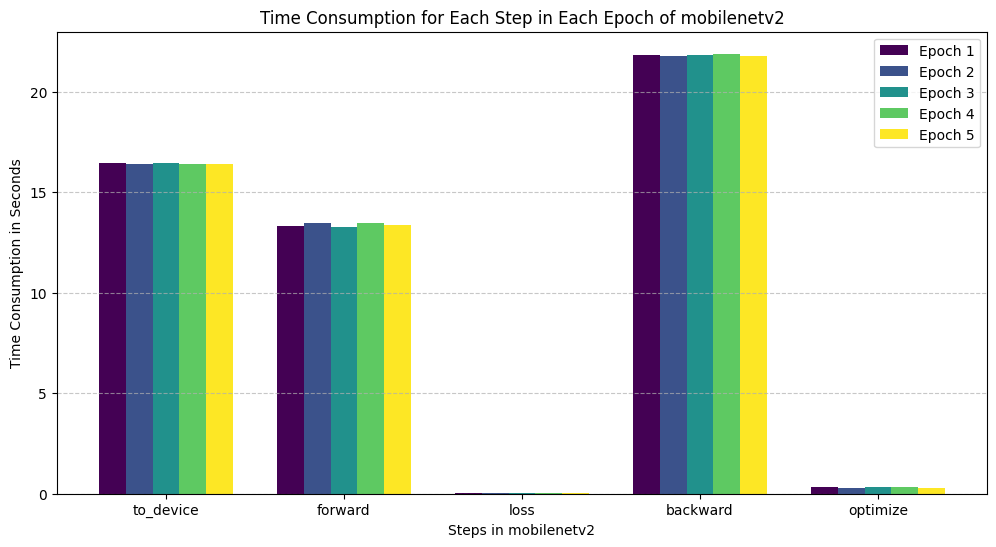

<Figure size 640x480 with 0 Axes>

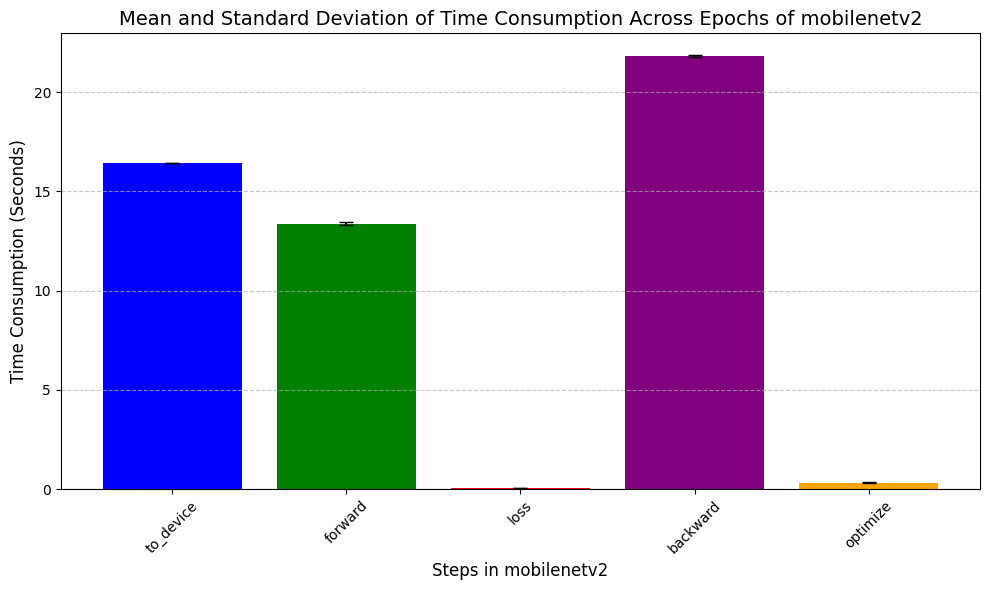

<Figure size 640x480 with 0 Axes>

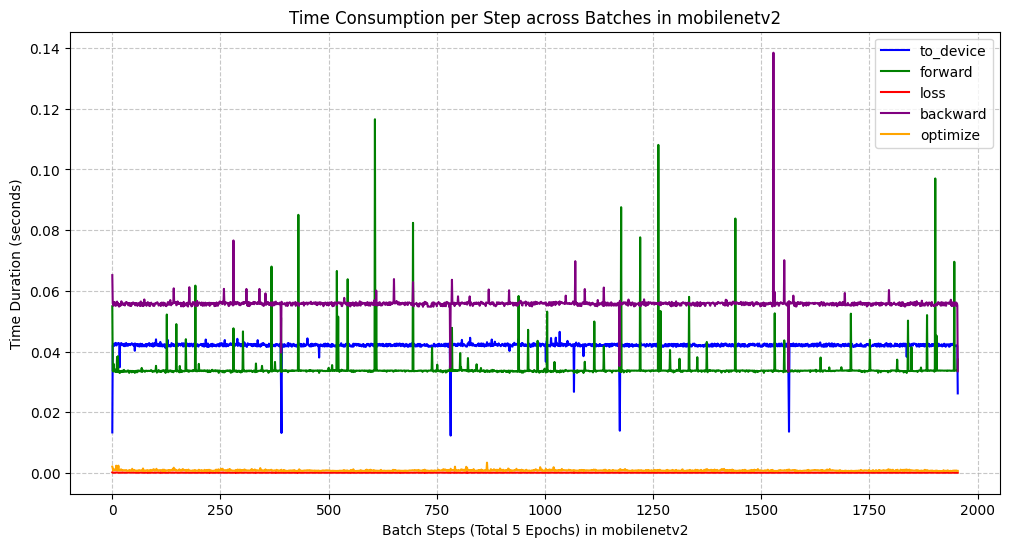

<Figure size 640x480 with 0 Axes>

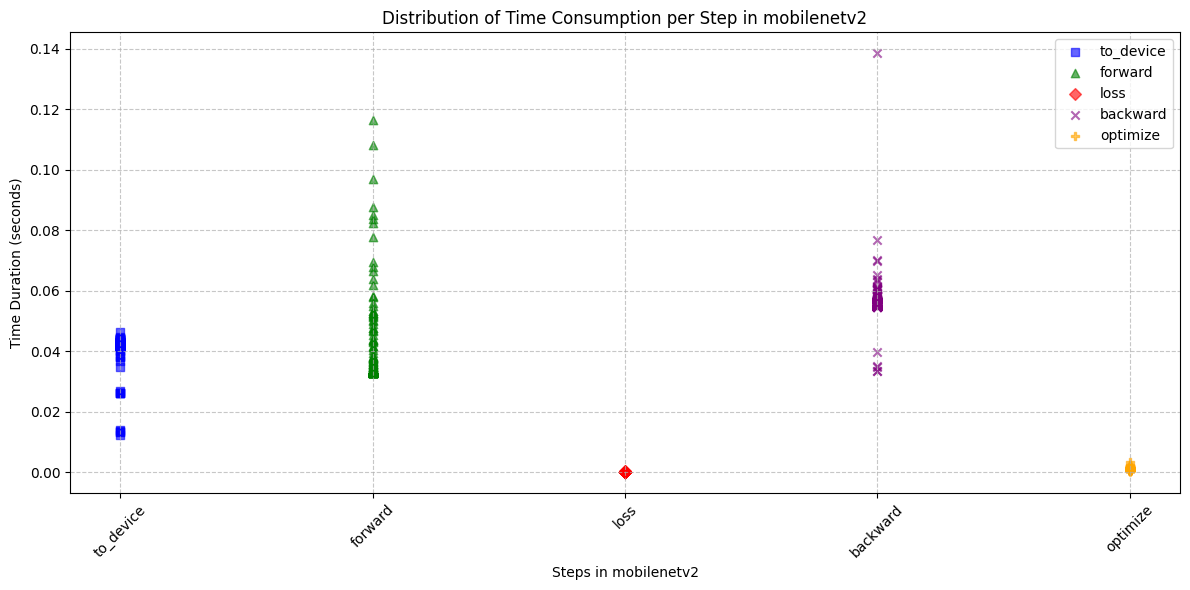

The current model is vgg13


/Users/dtjgp/Projects/GreenAI/4090/Functions/PlotAnalysis.py:86: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  energy_data = pd.read_csv(os.path.join(model_path, 'energy_consumption_file.csv'))


<Figure size 640x480 with 0 Axes>

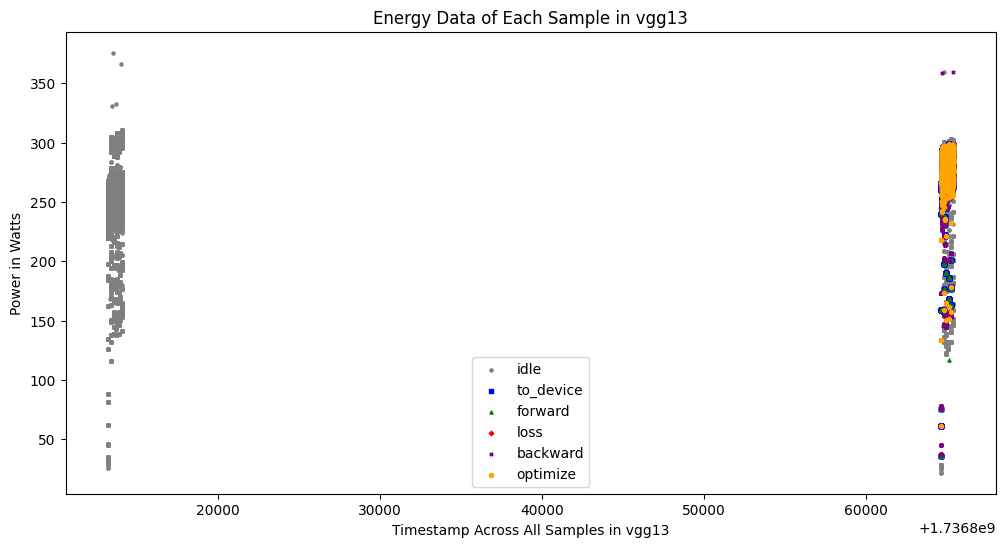

<Figure size 640x480 with 0 Axes>

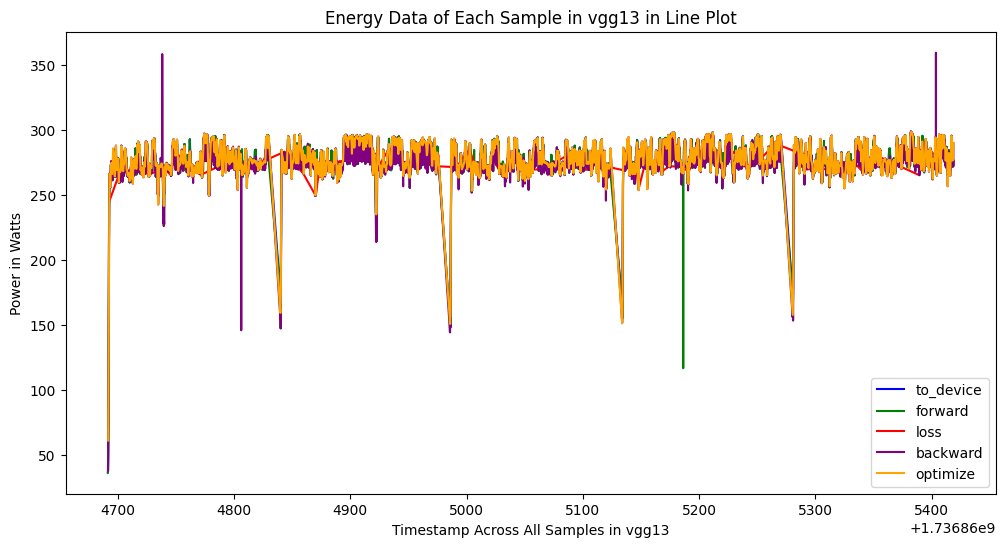

<Figure size 640x480 with 0 Axes>

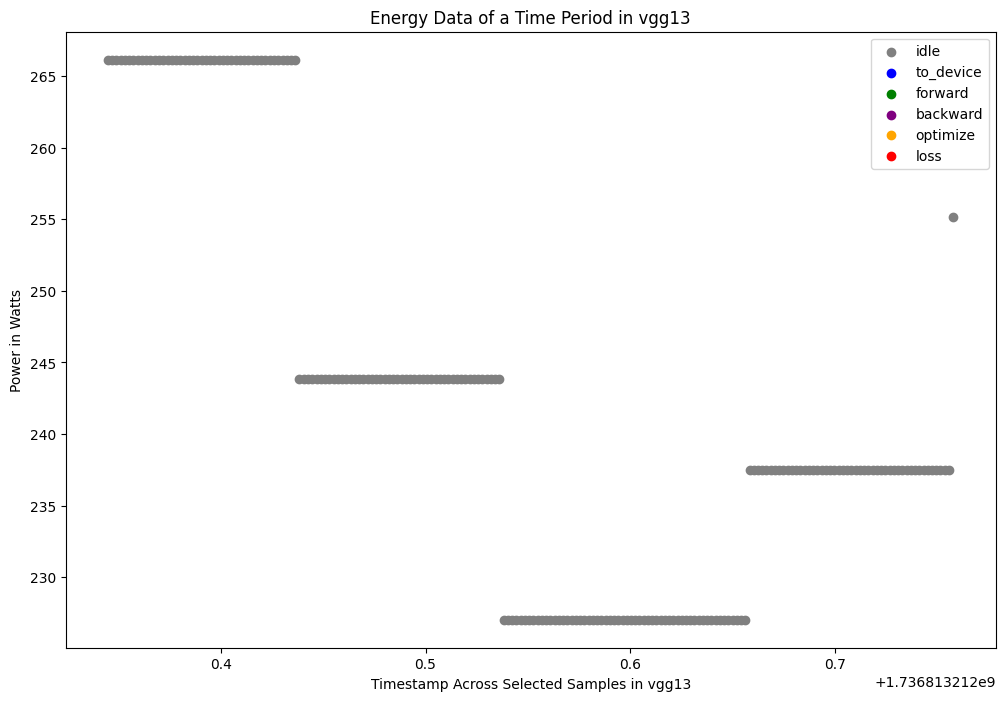

<Figure size 640x480 with 0 Axes>

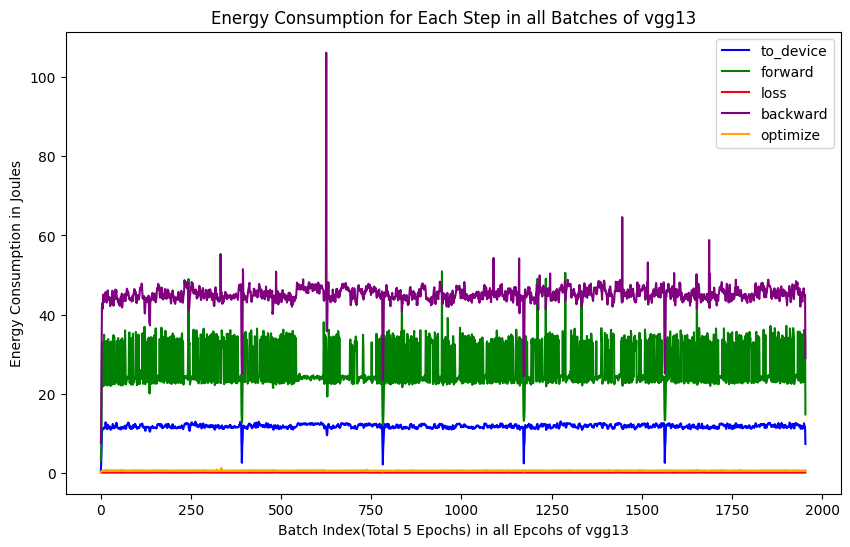

<Figure size 640x480 with 0 Axes>

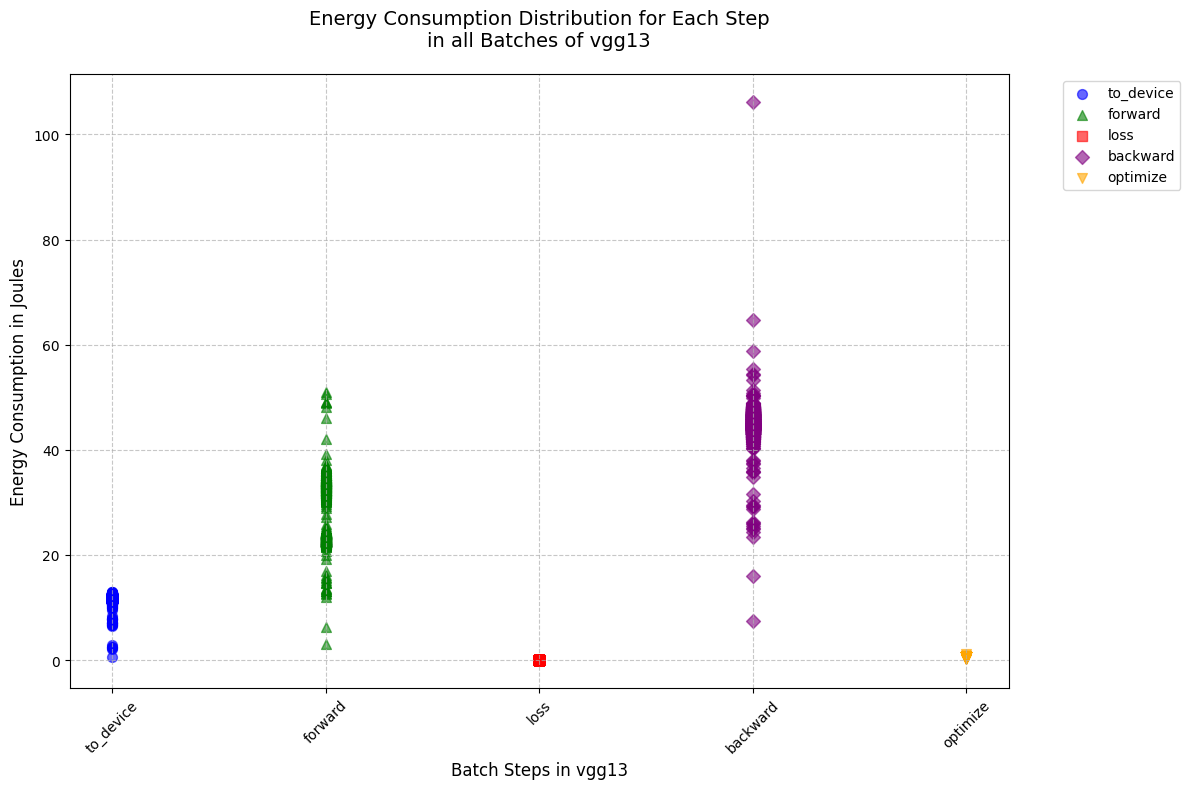

<Figure size 640x480 with 0 Axes>

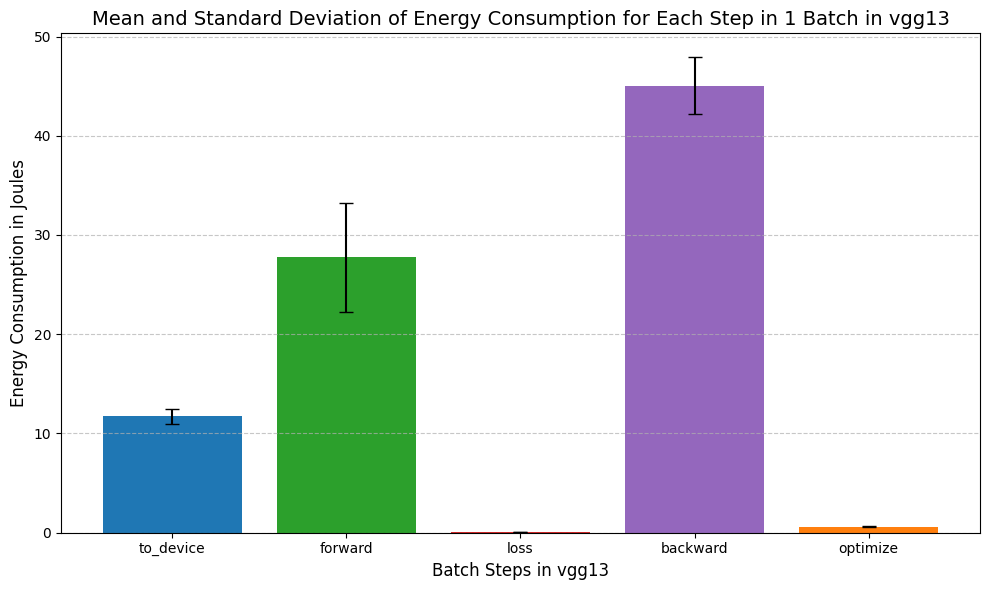

<Figure size 640x480 with 0 Axes>

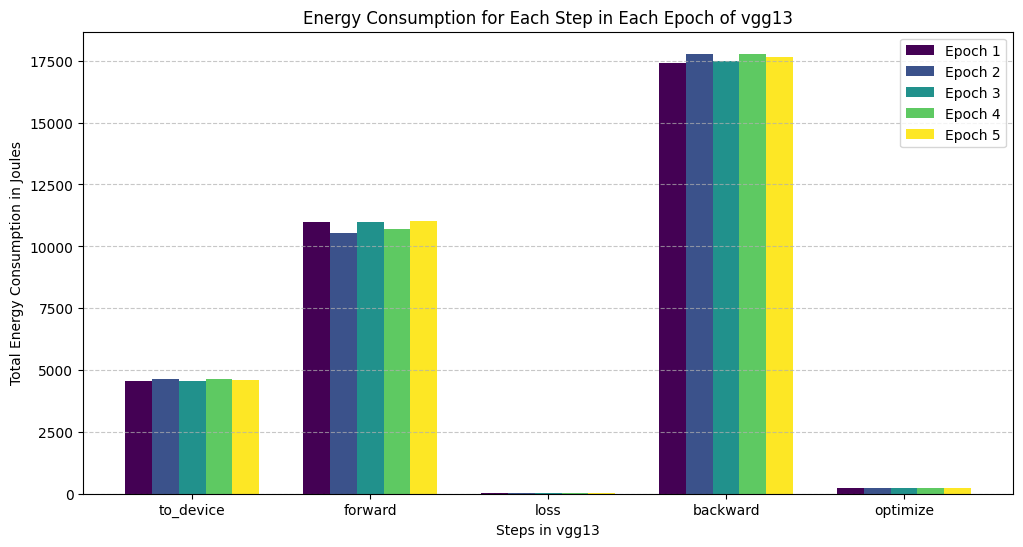

<Figure size 640x480 with 0 Axes>

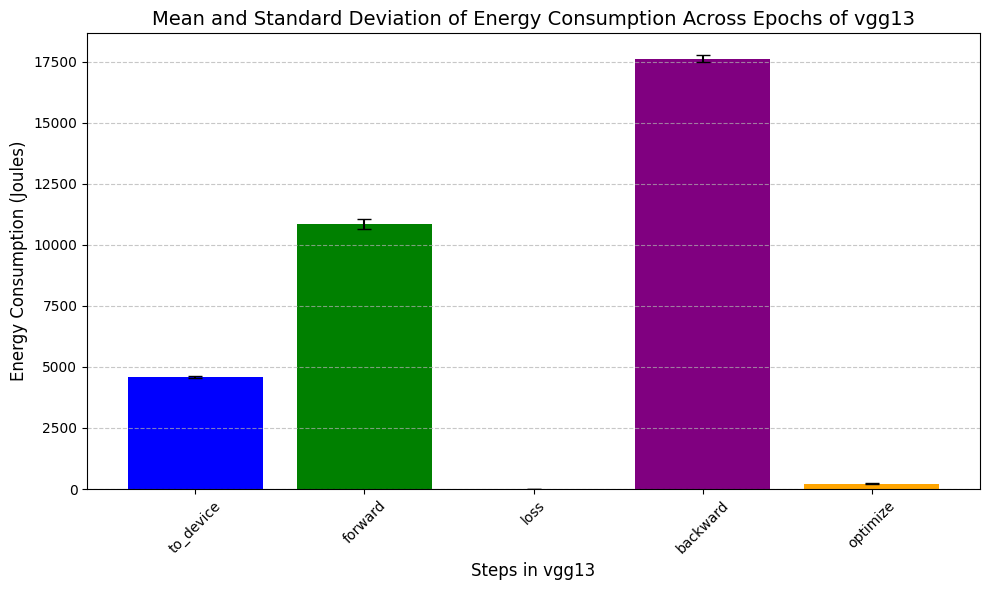

<Figure size 640x480 with 0 Axes>

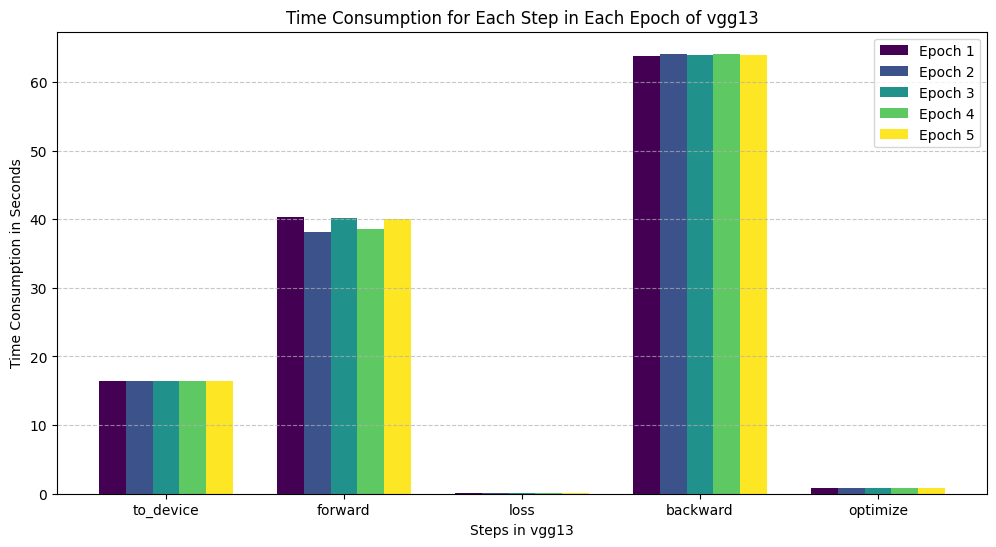

<Figure size 640x480 with 0 Axes>

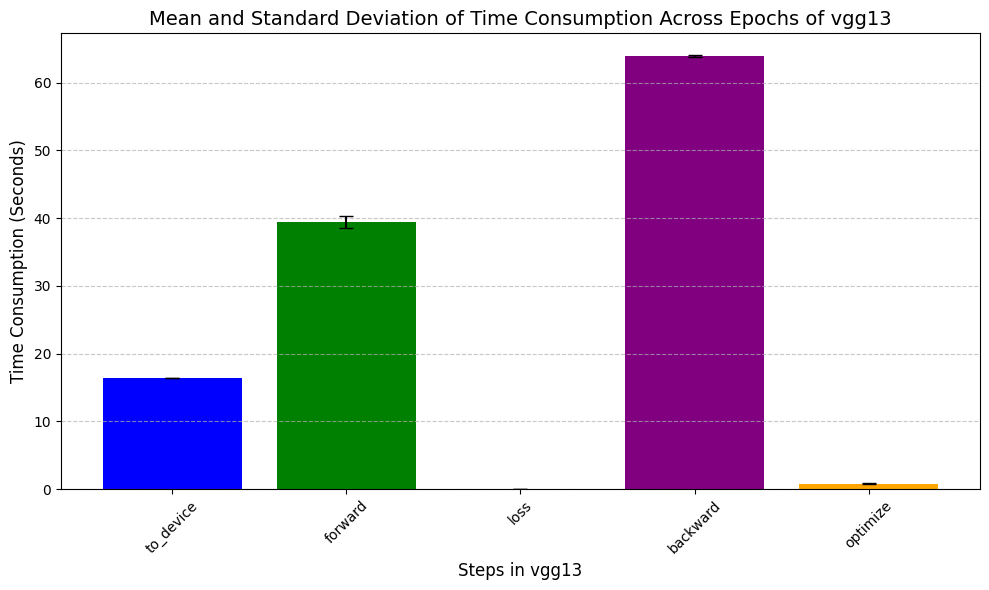

<Figure size 640x480 with 0 Axes>

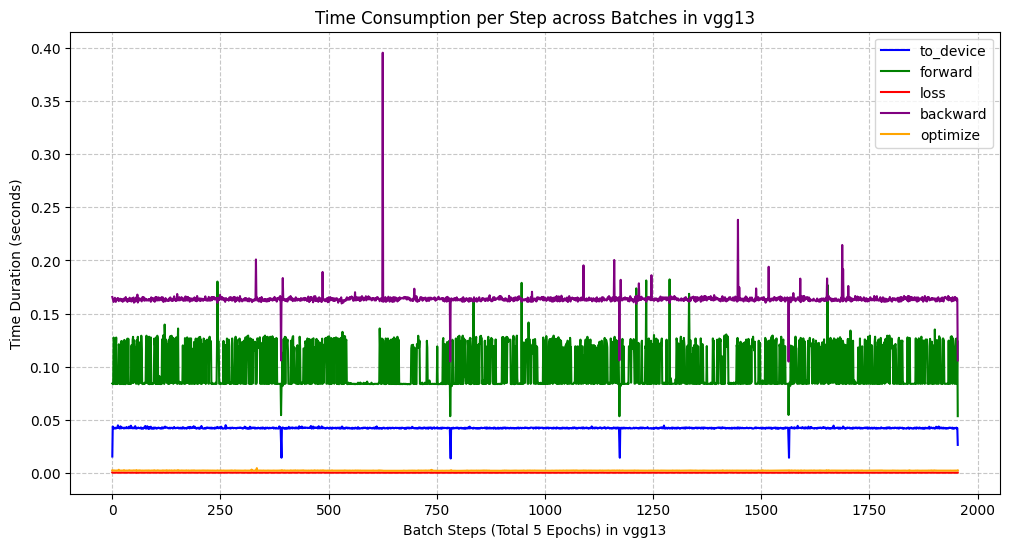

<Figure size 640x480 with 0 Axes>

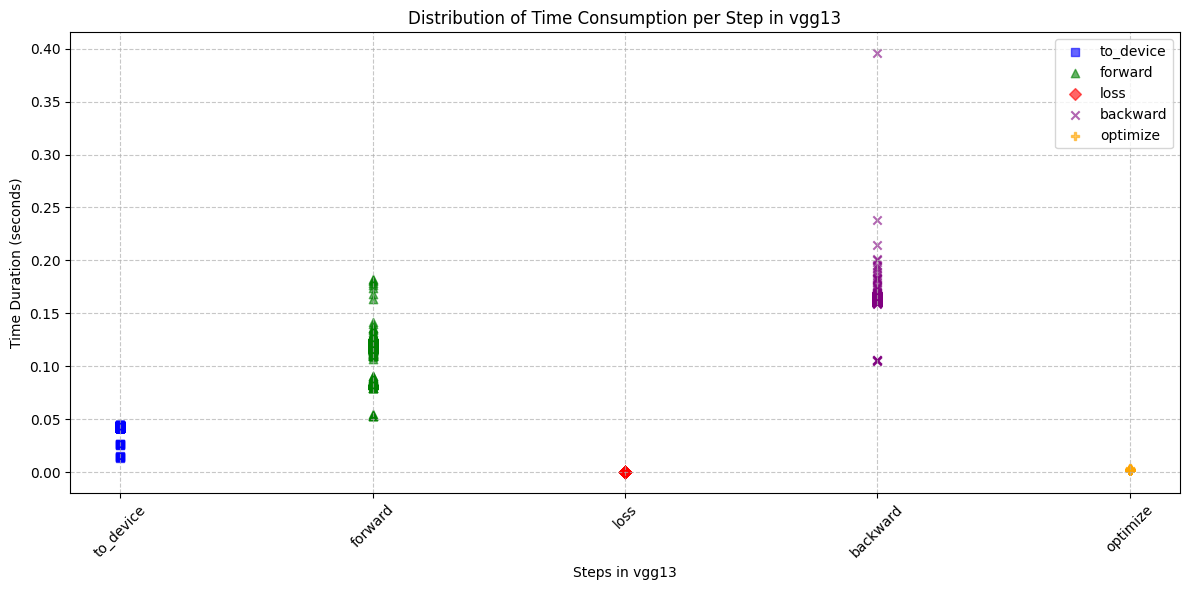

The current model is googlenet_mod7


<Figure size 640x480 with 0 Axes>

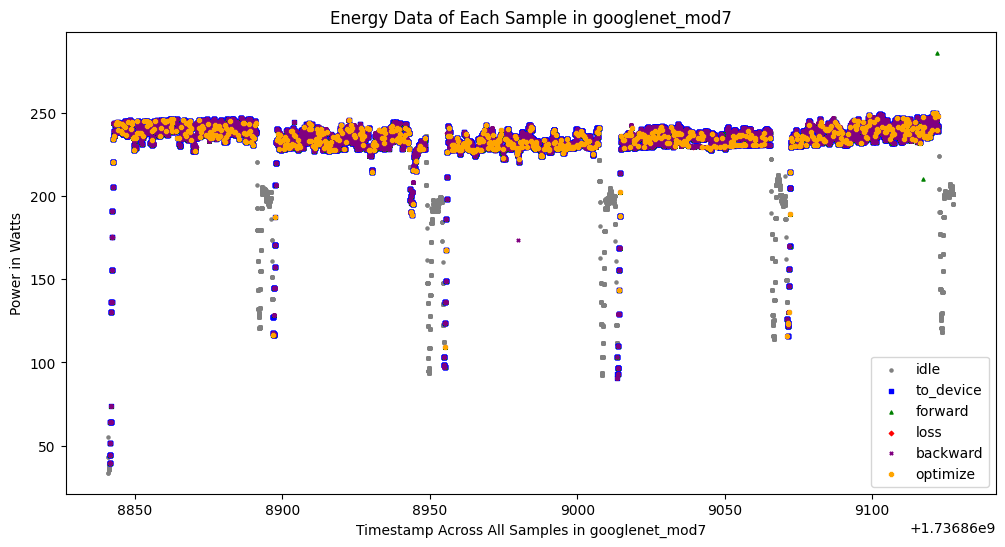

<Figure size 640x480 with 0 Axes>

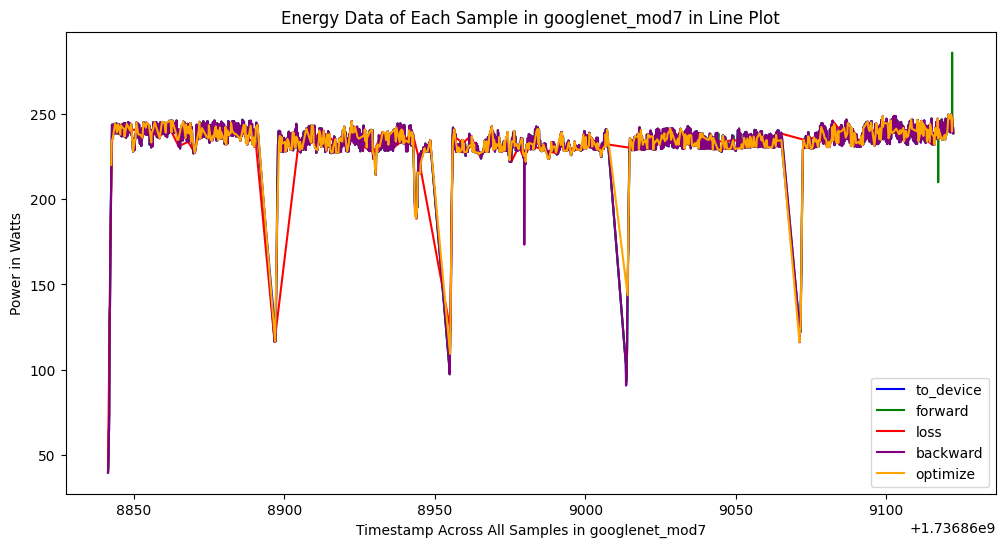

<Figure size 640x480 with 0 Axes>

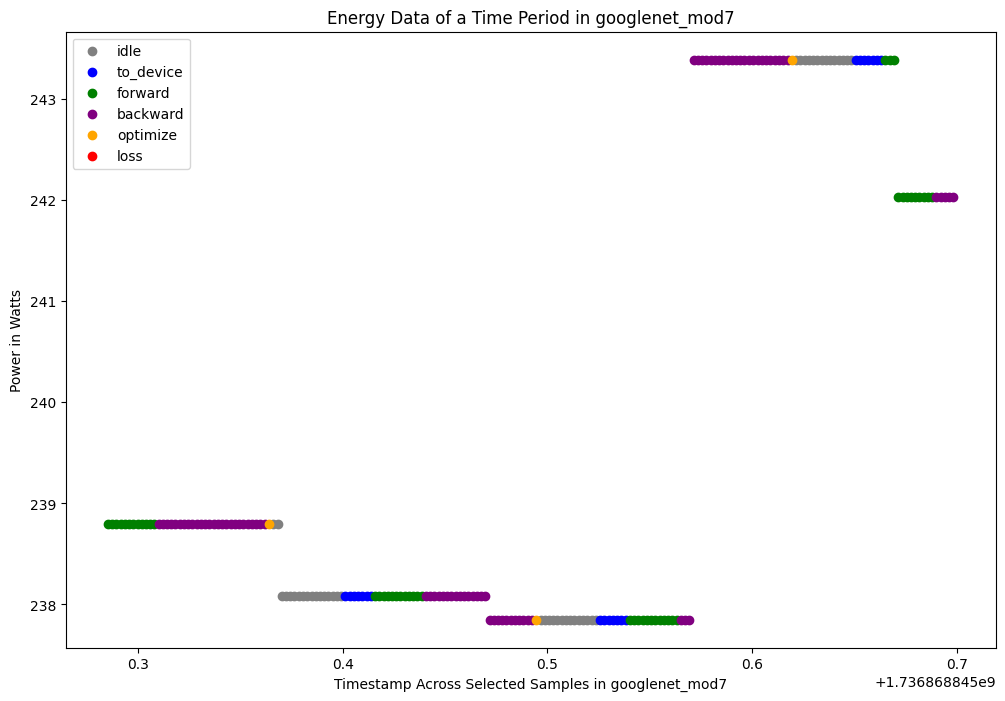

<Figure size 640x480 with 0 Axes>

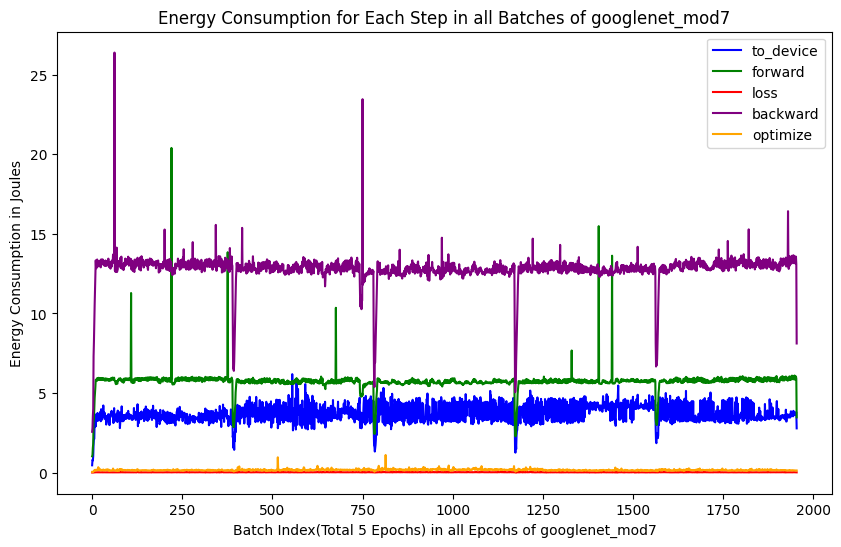

<Figure size 640x480 with 0 Axes>

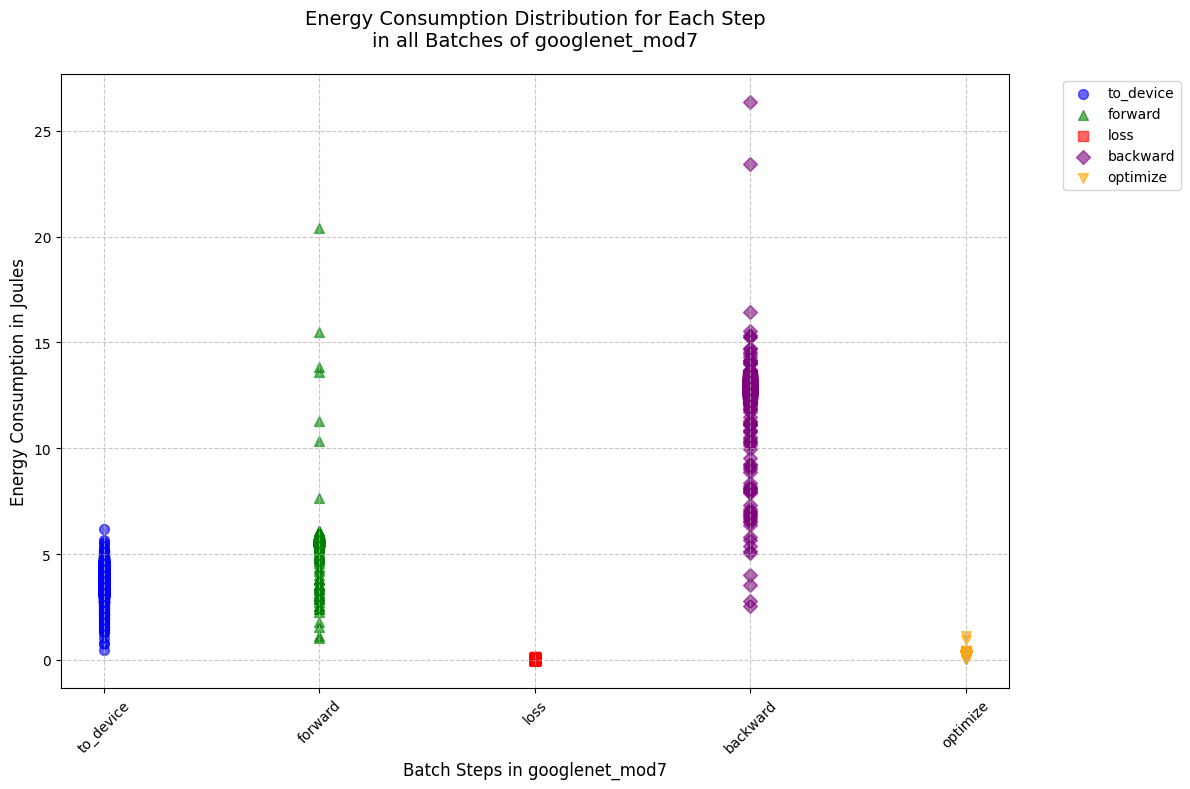

<Figure size 640x480 with 0 Axes>

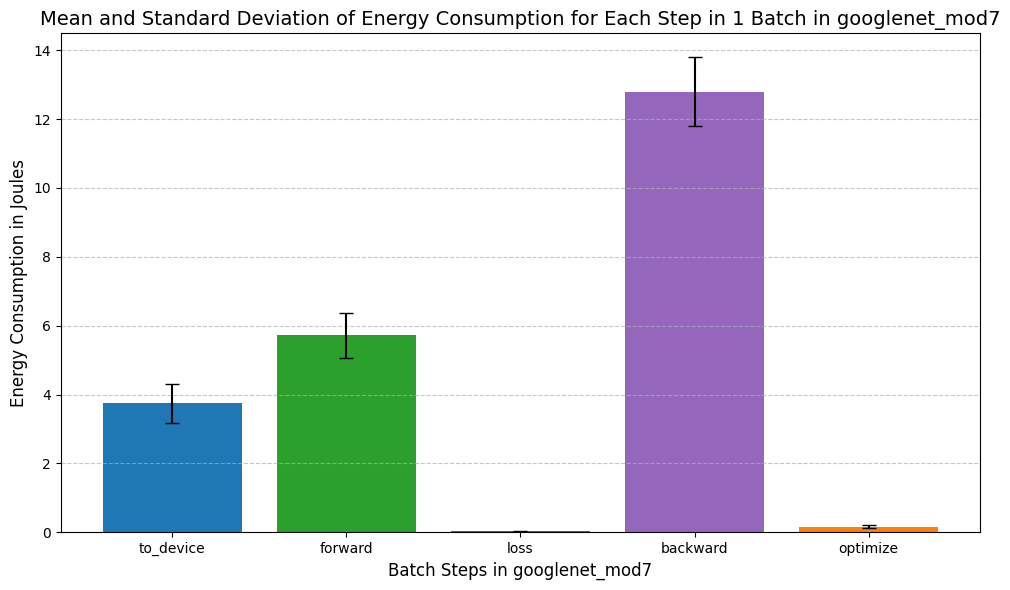

<Figure size 640x480 with 0 Axes>

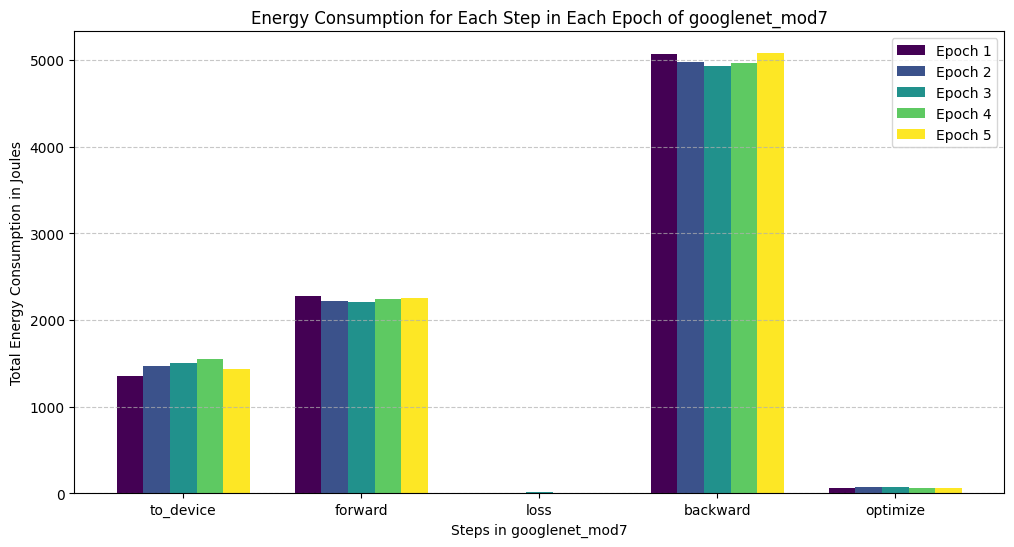

<Figure size 640x480 with 0 Axes>

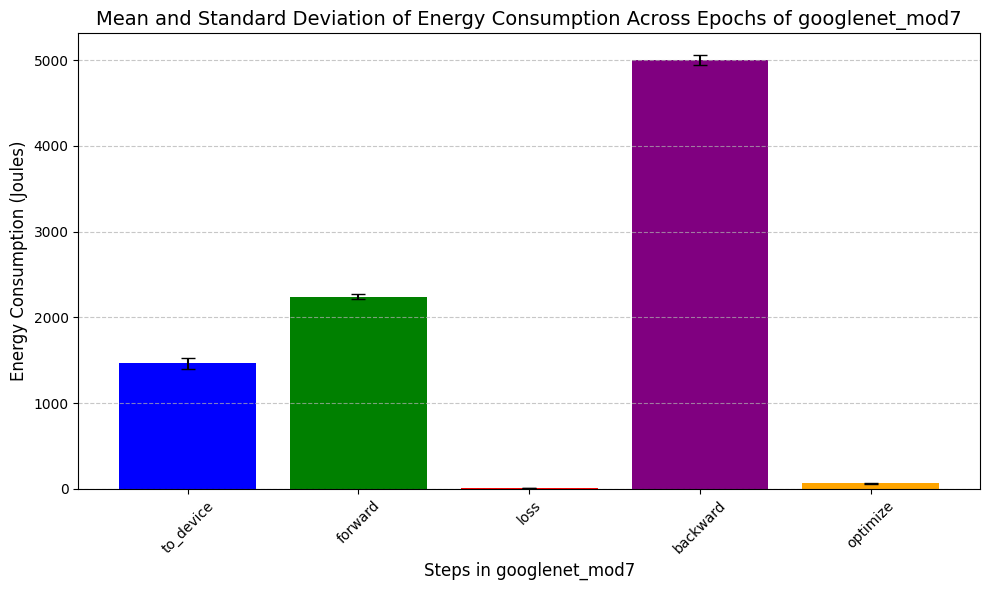

<Figure size 640x480 with 0 Axes>

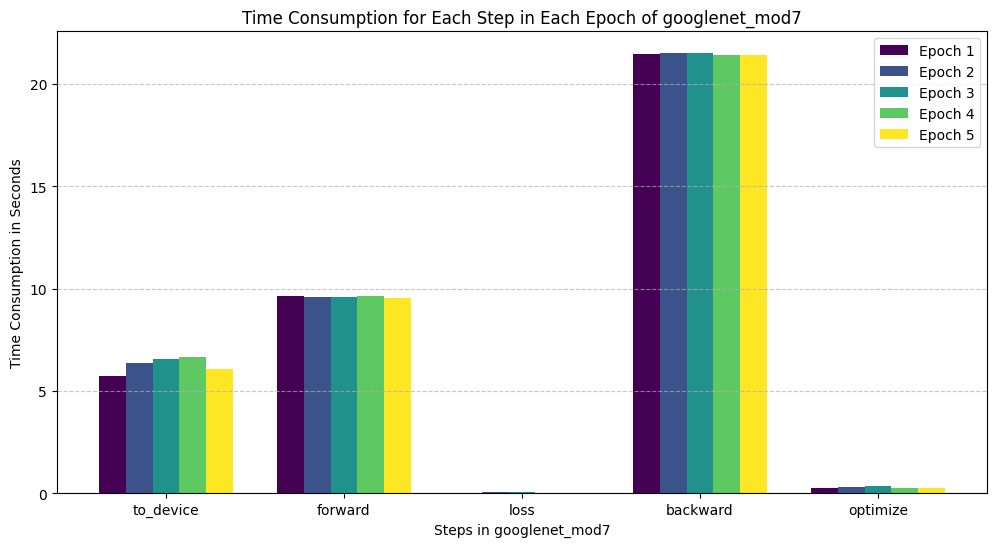

<Figure size 640x480 with 0 Axes>

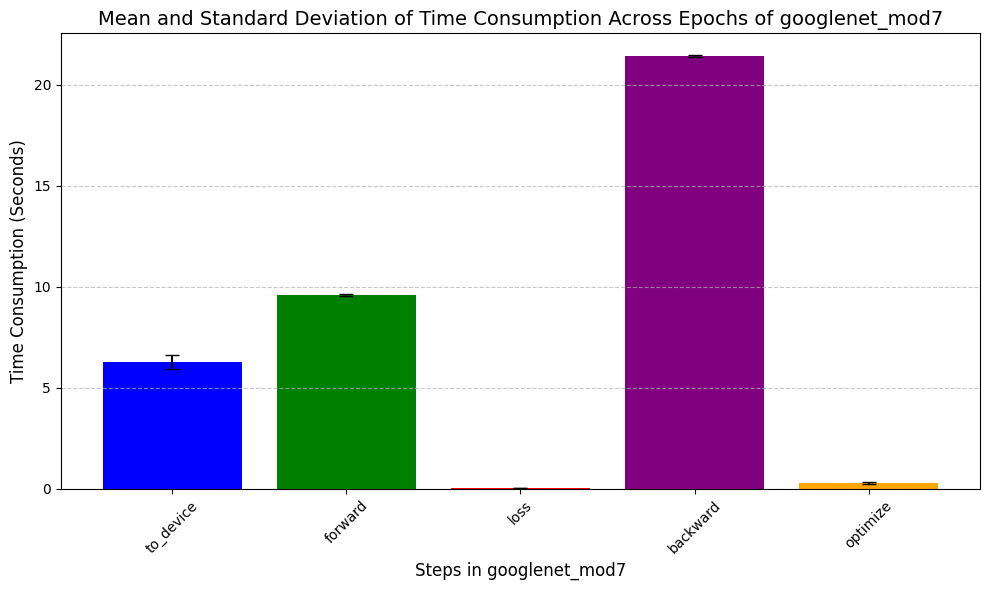

<Figure size 640x480 with 0 Axes>

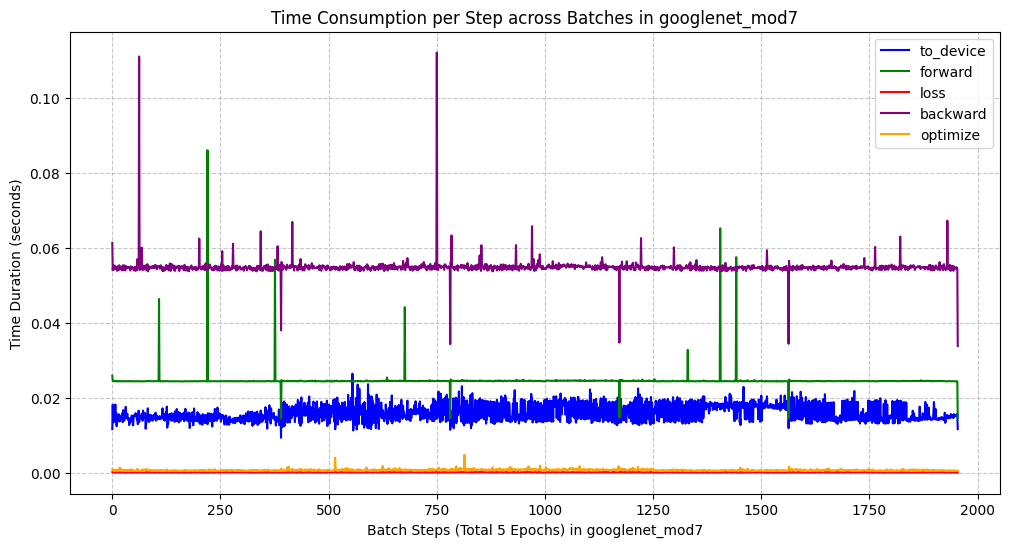

<Figure size 640x480 with 0 Axes>

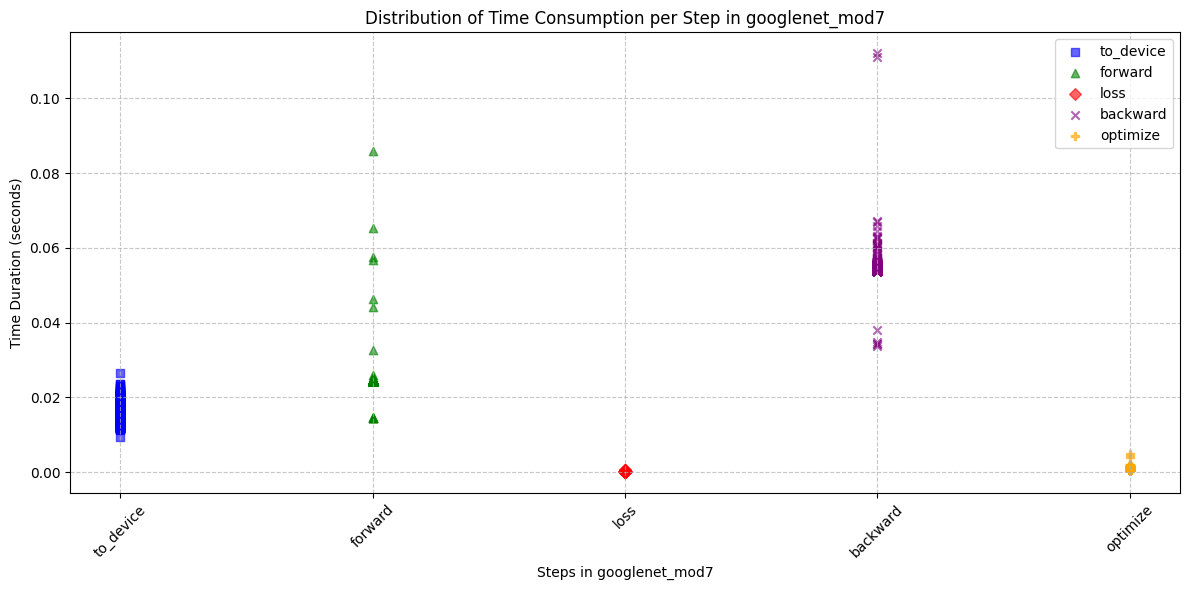

The current model is googlenet_mod9


<Figure size 640x480 with 0 Axes>

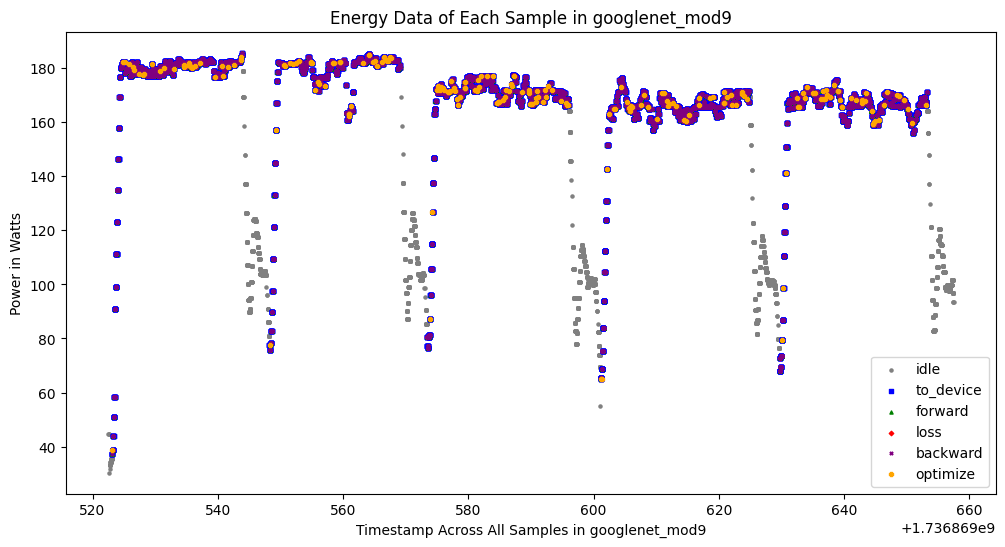

<Figure size 640x480 with 0 Axes>

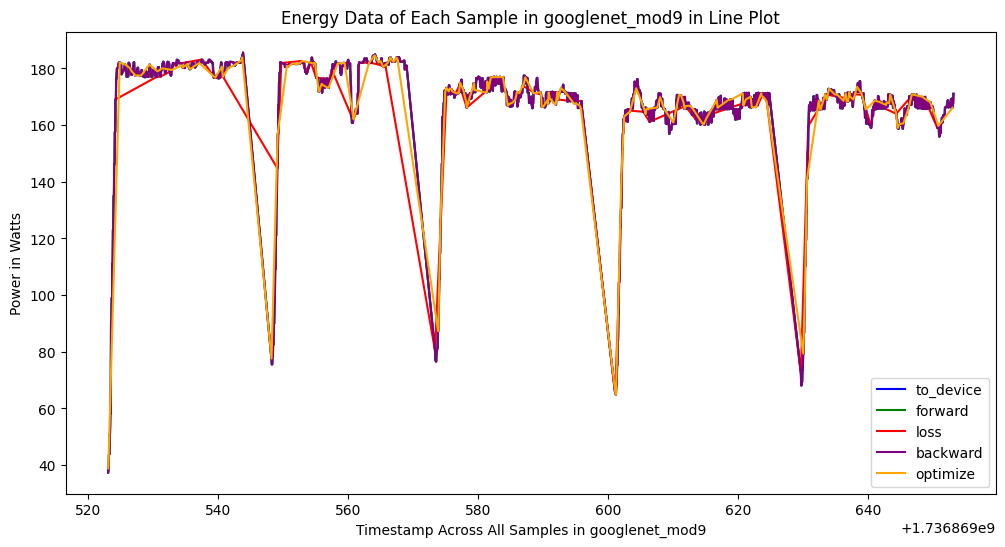

<Figure size 640x480 with 0 Axes>

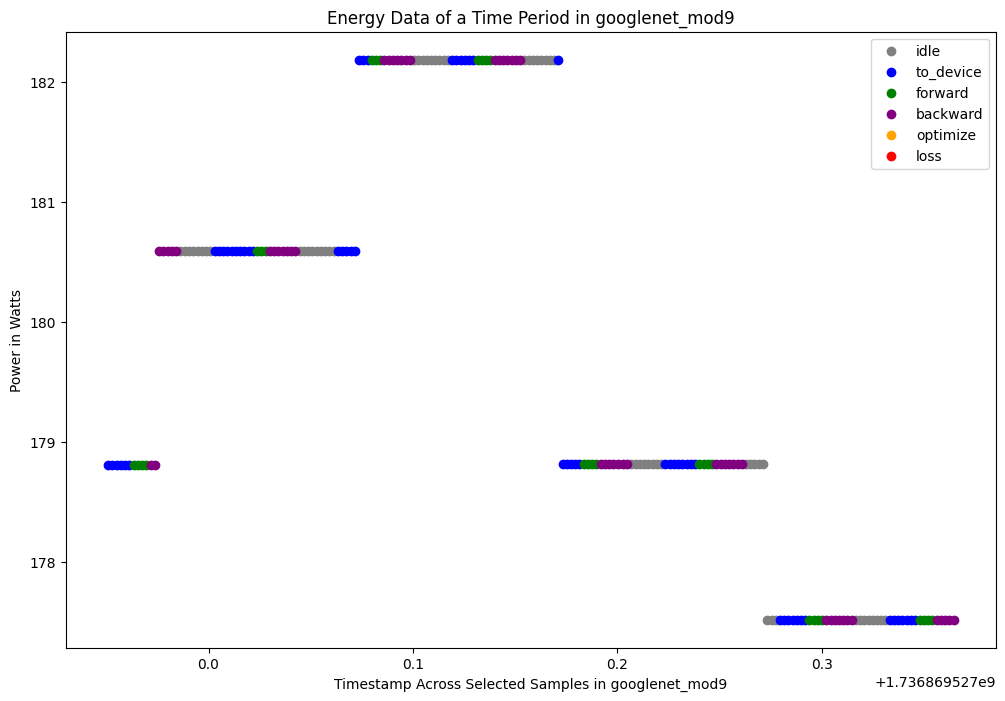

<Figure size 640x480 with 0 Axes>

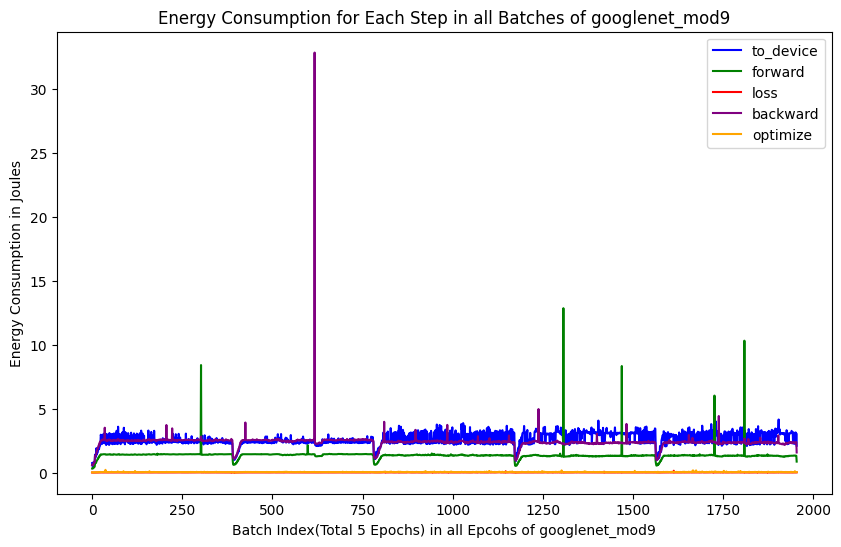

<Figure size 640x480 with 0 Axes>

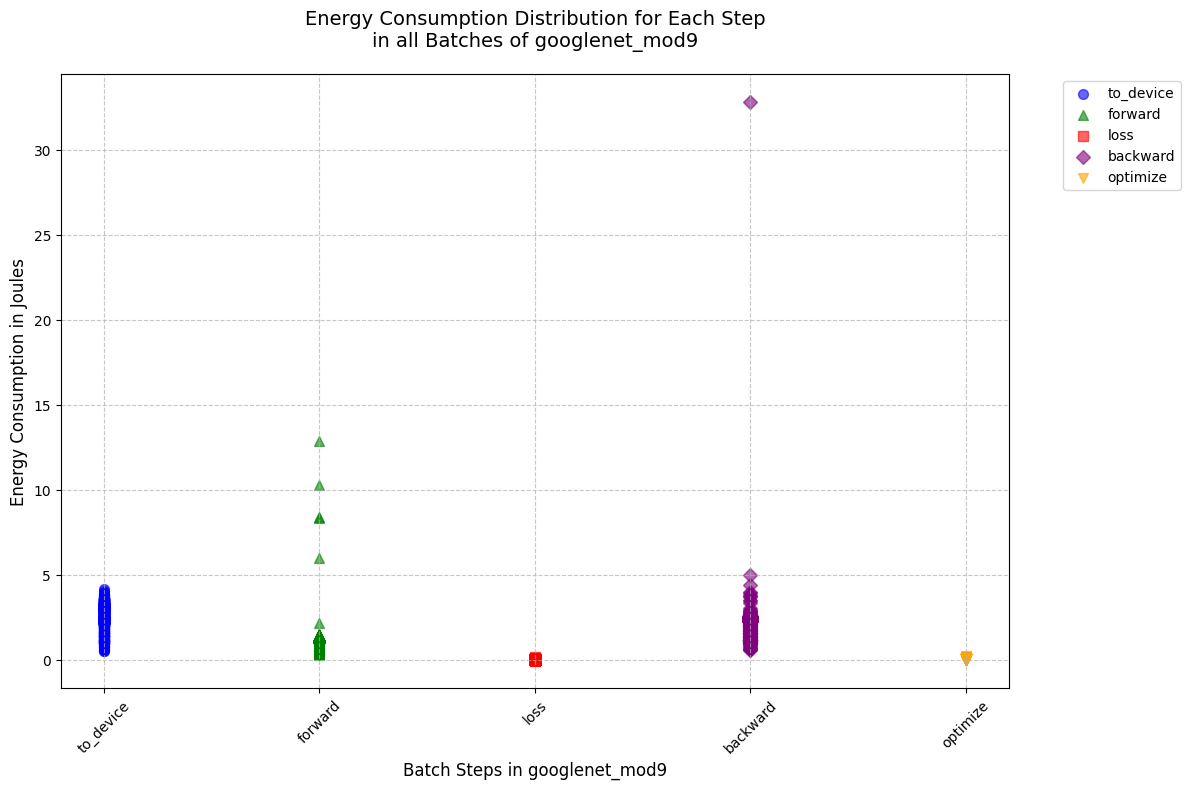

<Figure size 640x480 with 0 Axes>

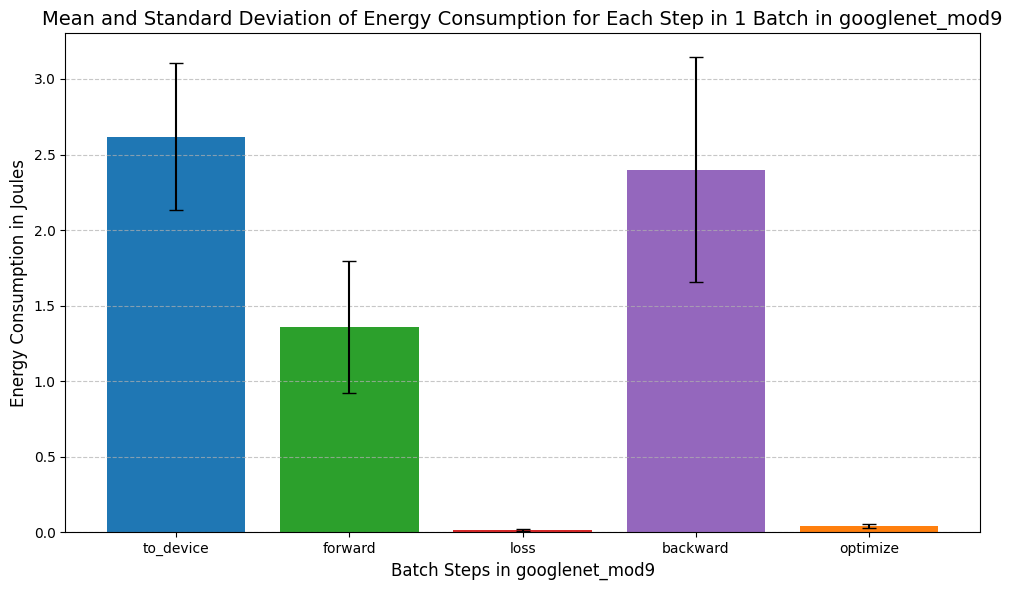

<Figure size 640x480 with 0 Axes>

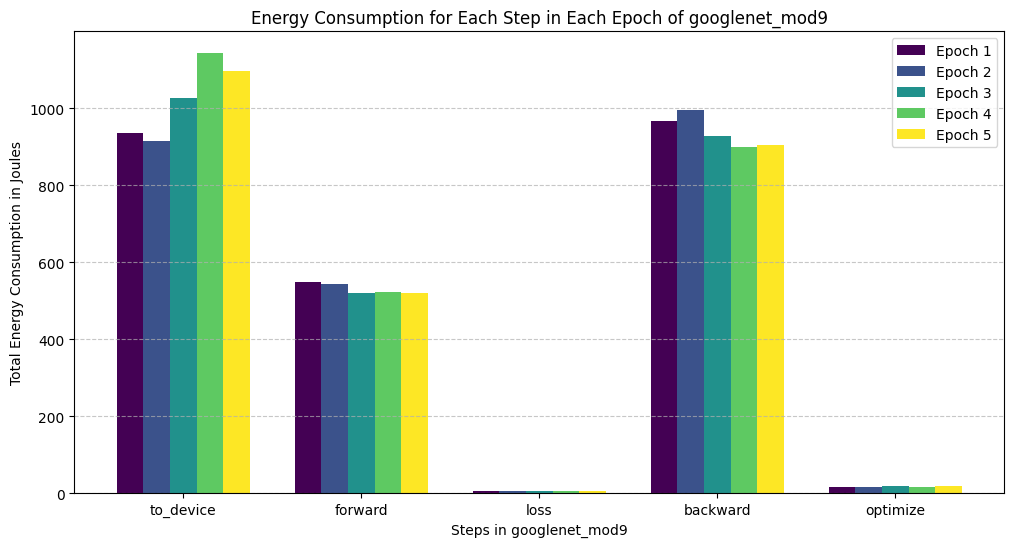

<Figure size 640x480 with 0 Axes>

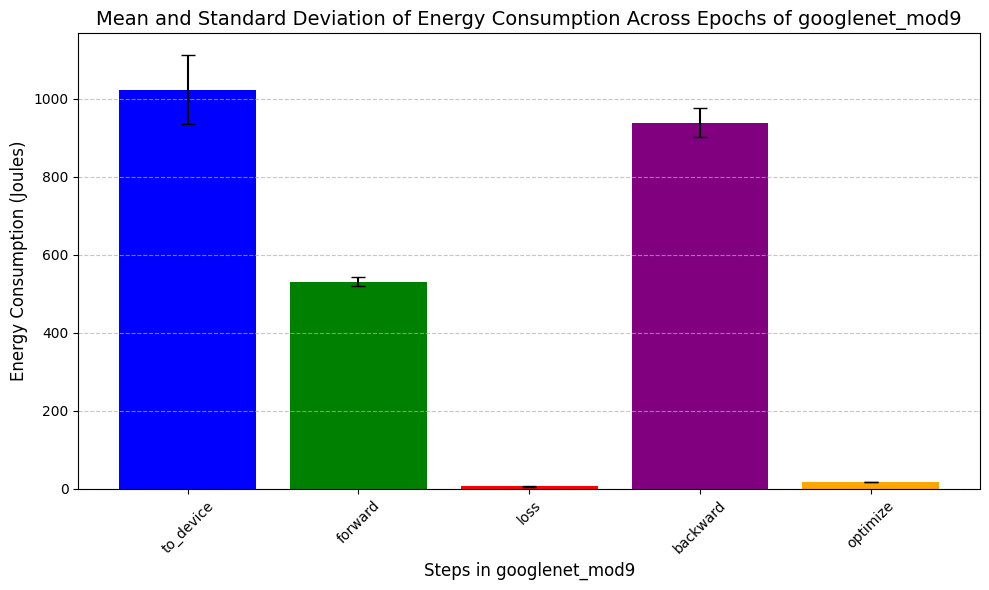

<Figure size 640x480 with 0 Axes>

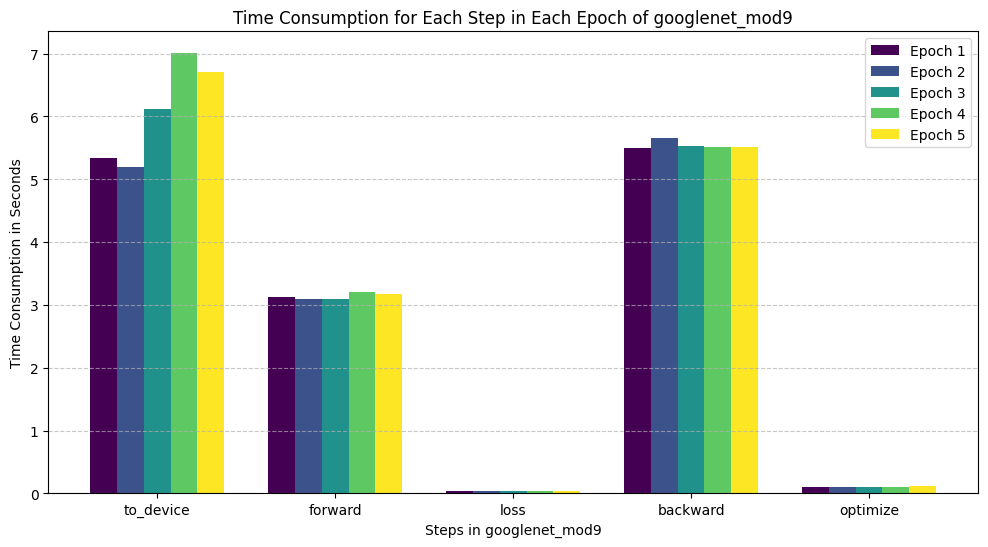

<Figure size 640x480 with 0 Axes>

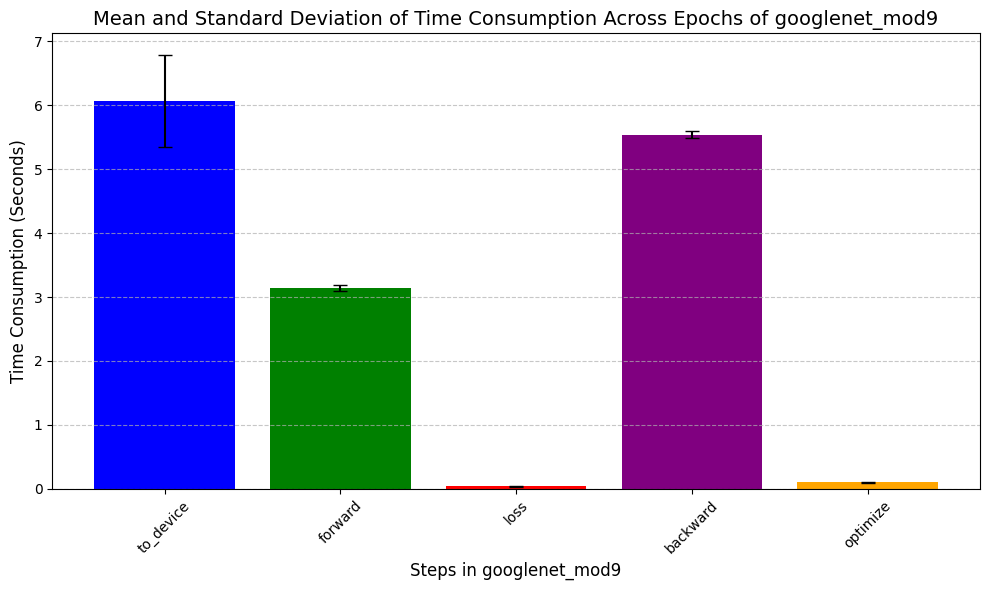

<Figure size 640x480 with 0 Axes>

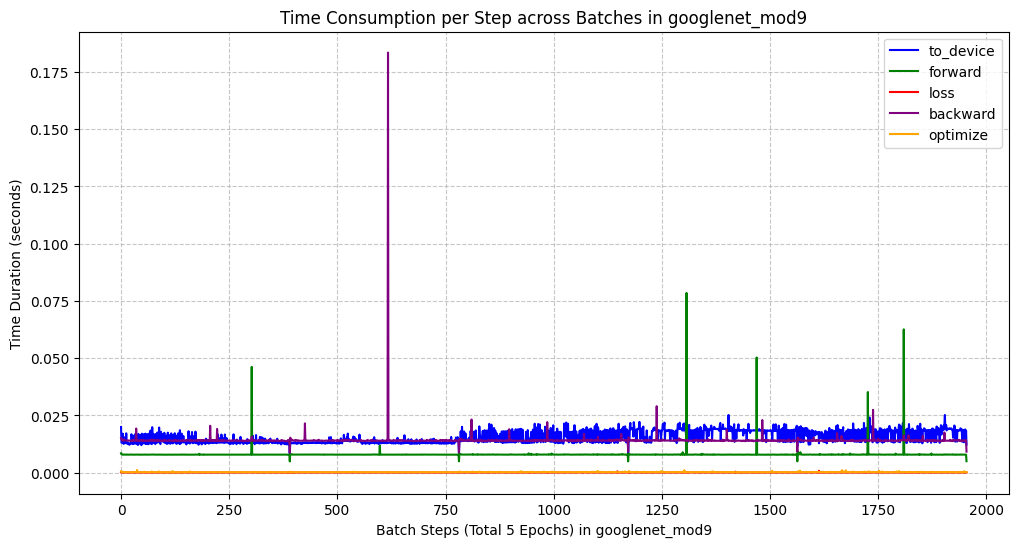

<Figure size 640x480 with 0 Axes>

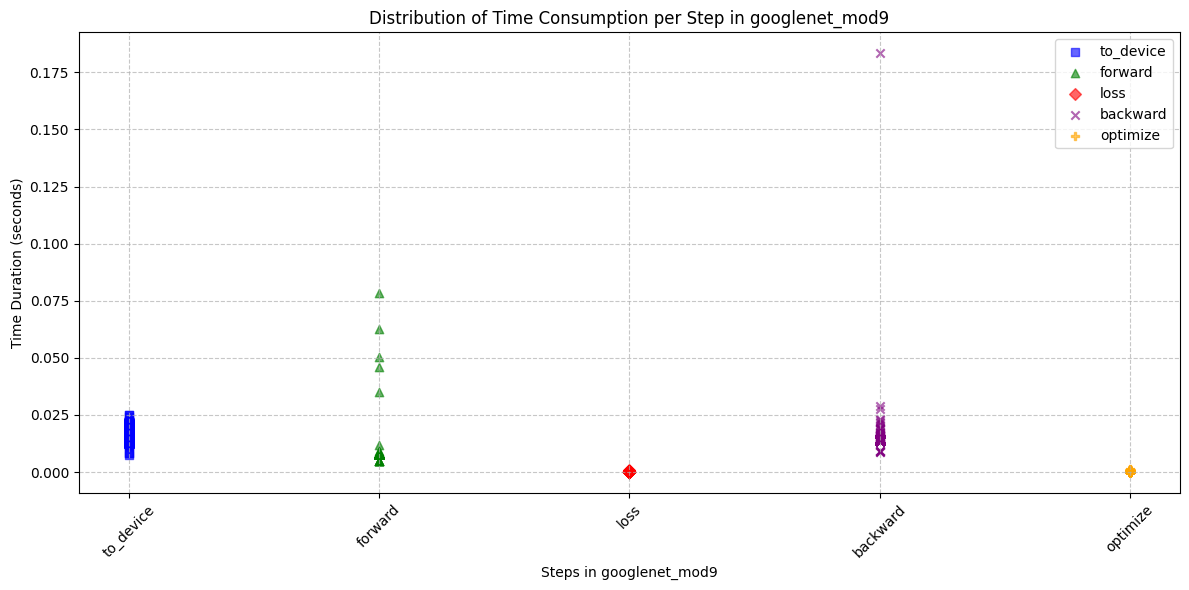

The current model is googlenet_mod8


<Figure size 640x480 with 0 Axes>

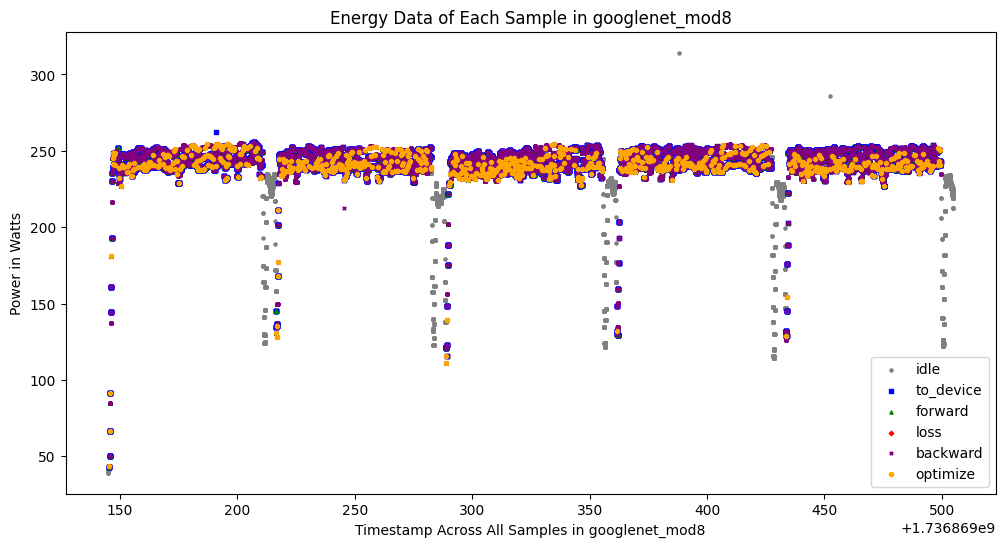

<Figure size 640x480 with 0 Axes>

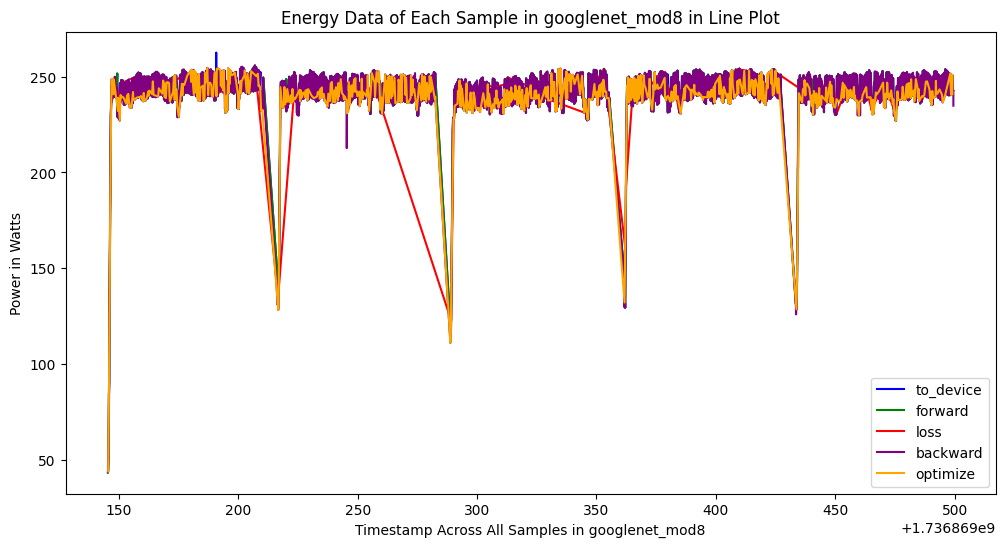

<Figure size 640x480 with 0 Axes>

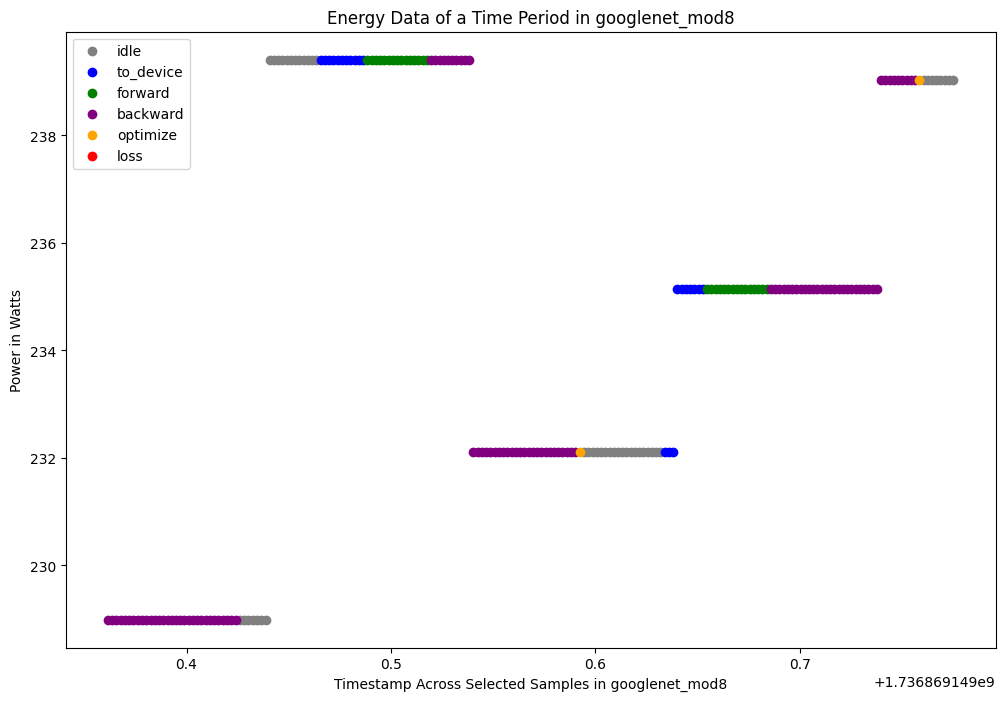

<Figure size 640x480 with 0 Axes>

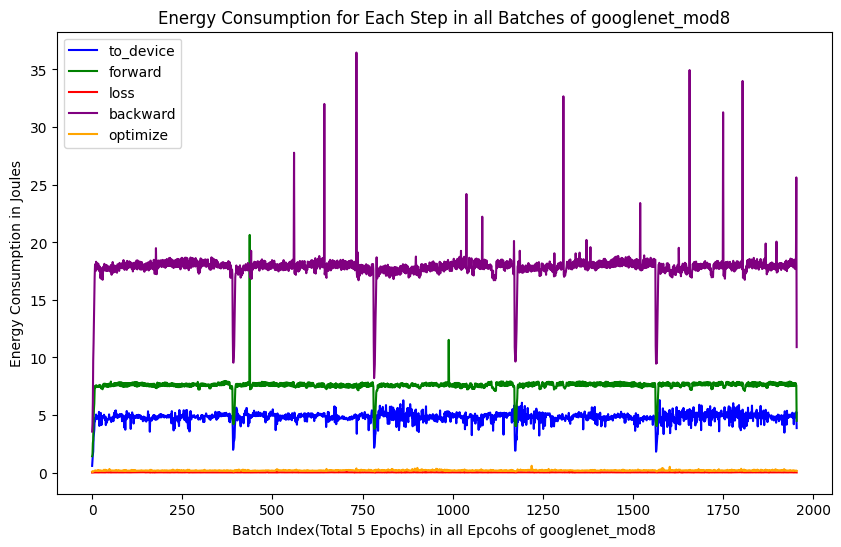

<Figure size 640x480 with 0 Axes>

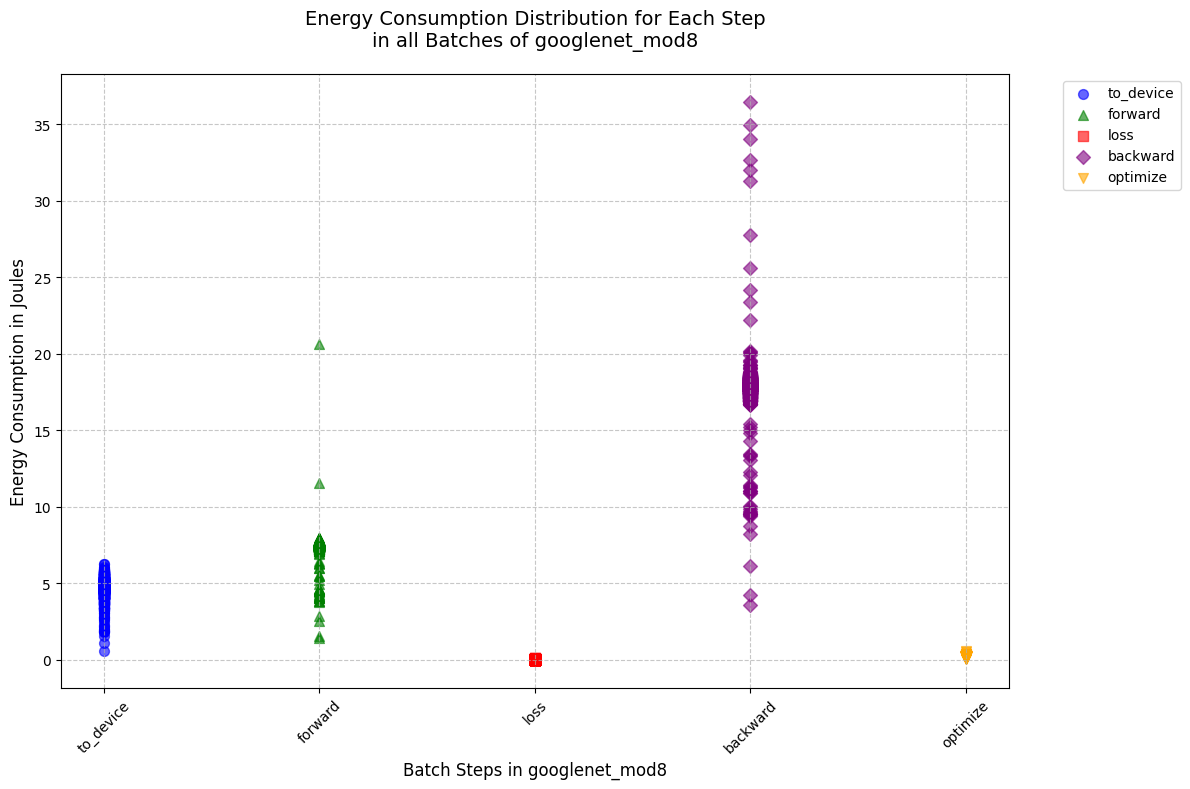

<Figure size 640x480 with 0 Axes>

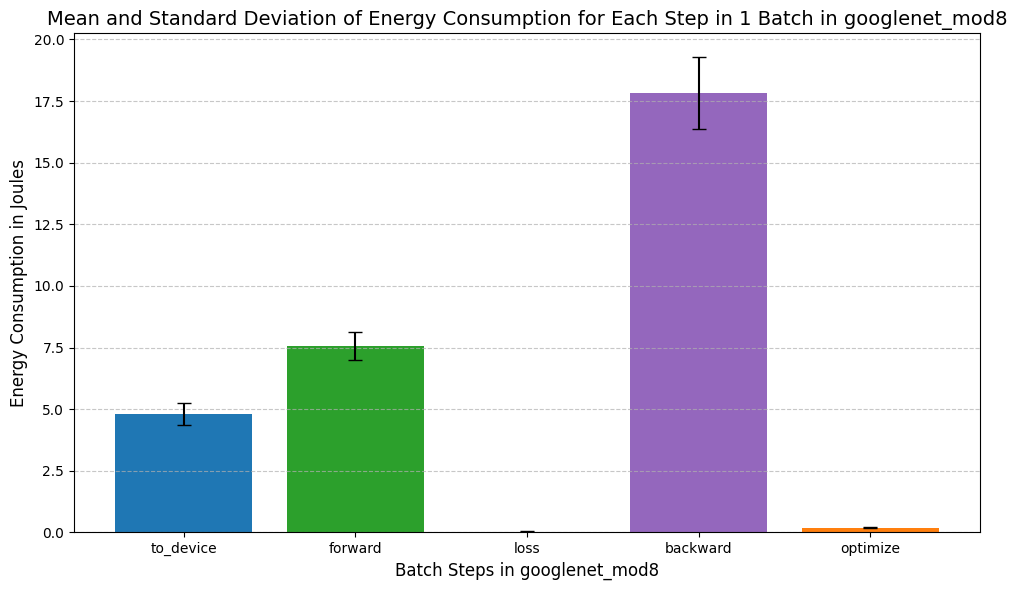

<Figure size 640x480 with 0 Axes>

In [ ]:
# create a dictionary to store the energy consumption mean and std data for each model
energy_data_models = {}
for model in data_folders:
    if model == '.DS_Store':
        continue
    print(f'The current model is {model}')
    energy_batch_mean, energy_batch_std = plot_model(model, model_data_folder_list, plot_folder)
    energy_data_models[model] = [energy_batch_mean, energy_batch_std]

In [8]:
print(energy_data_models)

{'googlenet_origin': [array([ 636.3762059 , 3148.23460301,    9.78791981, 5605.45154196,
         80.05592405]), array([38.20882322, 22.70507177,  0.13559359, 25.57078152,  2.9110379 ])], 'resnet50': [array([ 524.27549322, 4342.87650804,    8.66591885, 6838.66861771,
         88.835721  ]), array([22.43223243, 44.58337112,  1.15515973, 49.61781299,  5.57080745])], 'resnet34': [array([ 784.59497271, 5216.13657039,   11.4271    , 9906.05504845,
        131.32858286]), array([57.56090775, 57.42968387,  0.31606643, 96.44616379,  2.95382844])], 'mobilenetv2': [array([1323.84832939, 4699.88825795,    8.96992689, 4957.04200215,
         74.05545413]), array([ 3.9574158 , 44.88314664,  0.17337998, 29.33471318,  3.05158039])], 'vgg13': [array([2.07410806e+03, 1.68106325e+04, 1.95246398e+01, 2.35258925e+04,
       2.89185857e+02]), array([3.16819125e+01, 5.50577695e+02, 3.29636007e-01, 2.56830915e+02,
       3.83671769e+00])], 'googlenet_mod7': [array([ 705.55616746, 3647.46232326,   13.62776733

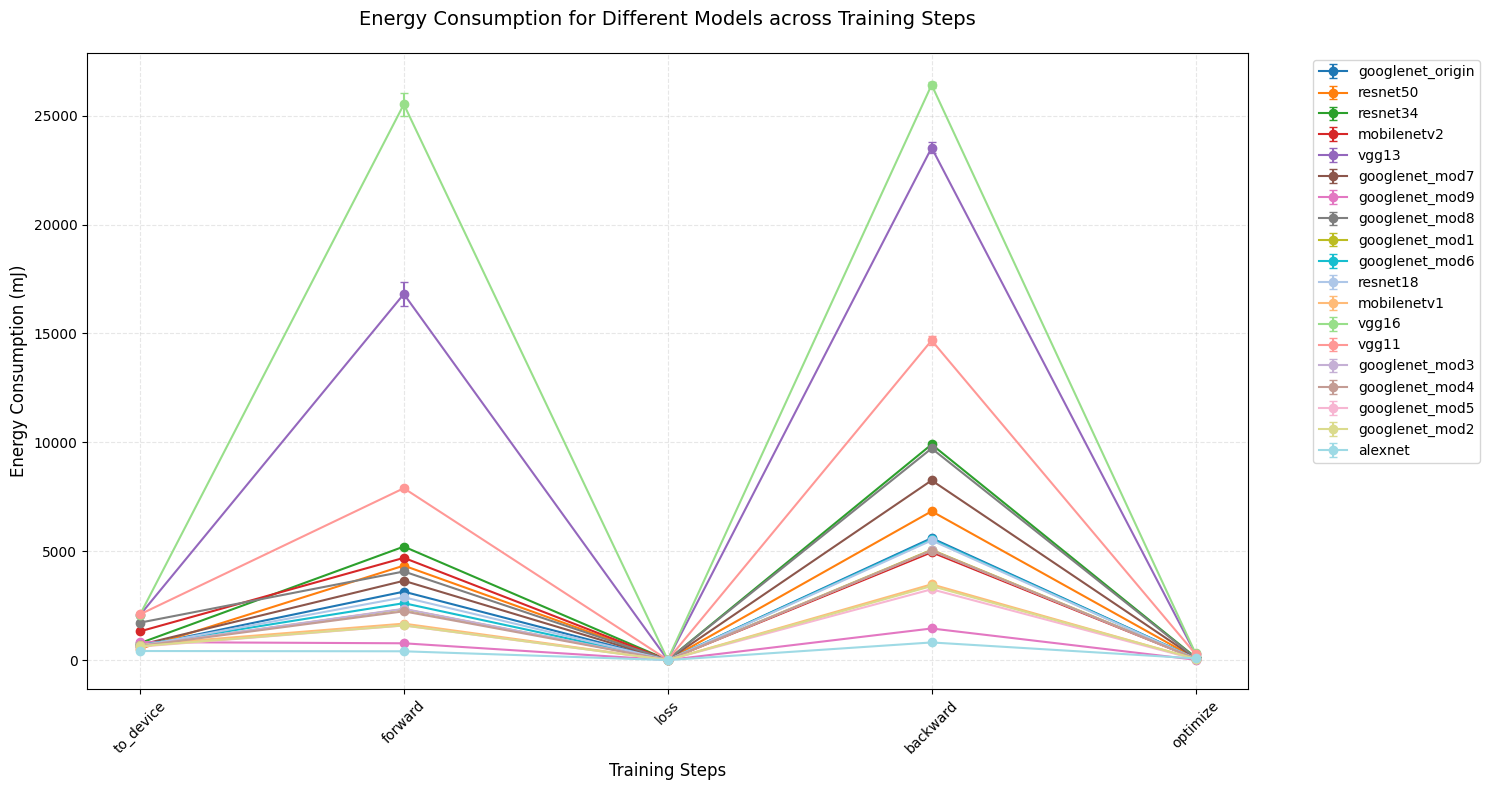

In [ ]:
# Create a more distinct color palette suitable for publication
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5',
          '#c49c94', '#f7b6d2', '#dbdb8d', '#9edae5', '#393b79']

plt.figure(figsize=(15, 8))
x_axis = ['to_device', 'forward', 'loss', 'backward', 'optimize']

for (model, energy_data), color in zip(energy_data_models.items(), colors):
    energy_batch_mean = energy_data[0]
    energy_batch_std = energy_data[1]
    plt.errorbar(x_axis, energy_batch_mean, yerr=energy_batch_std, 
                label=model, marker='o', color=color, 
                capsize=3, capthick=1, markersize=6, 
                linewidth=1.5)

plt.grid(True, linestyle='--', alpha=0.3)
plt.xlabel('Training Steps', fontsize=12)
plt.ylabel('Energy Consumption (mJ)', fontsize=12)
plt.title('Energy Consumption for Different Models across Training Steps', 
          fontsize=14, pad=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', 
          fontsize=10, frameon=True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## analysis the sample loss rate 

In [ ]:
missing_rate_list = []
model_list = []
for model_data_path in model_data_folder_list:
    # print out the current model name
    model_name = model_data_path.split('/')[-3]
    print(model_name)
    # if the model name is .DS_Store, skip it
    if model_name == '.DS_Store':
        continue
    else:
        model_list.append(model_name)


        # find out the files in the model_data_path
        files = os.listdir(model_data_path)
        # if files is .DS_Store, remove it
        if '.DS_Store' in files:
            files.remove('.DS_Store')
        # print(files)

        # load the data
        labeled_energy_data = pd.read_csv(os.path.join(model_data_path, 'labeled_energy_data.csv'))



        # Calculate the total energy consumption for all the labeled_energy_data
        # count the number of rows in the labeled_energy_data, which is the number of samples
        number_of_samples = labeled_energy_data.shape[0]
        print('Number of samples:', number_of_samples)

        # get the start and end time of the labeled_energy_data
        start_time = labeled_energy_data['timestamp'].iloc[0]
        end_time = labeled_energy_data['timestamp'].iloc[-1]
        print('Start time:', start_time)
        print('End time:', end_time)

        # Calculate the theorectical number of samples based on the sampling rate
        sample_rate = 0.002 # 2ms
        theoretical_number_of_samples = np.round((end_time - start_time) / sample_rate)
        print('Theoretical number of samples:', theoretical_number_of_samples)

        # calculate the missing rate
        missing_rate = 1 - number_of_samples / theoretical_number_of_samples
        print('Missing rate:', missing_rate)

        print('-'*50)

        missing_rate_list.append(missing_rate)

googlenet_origin
Number of samples: 109020
Start time: 1736809927.980775
End time: 1736810158.2086613
Theoretical number of samples: 115114.0
Missing rate: 0.05293882585958265
--------------------------------------------------
resnet50
Number of samples: 168623
Start time: 1736809566.4453225
End time: 1736809920.2037492
Theoretical number of samples: 176879.0
Missing rate: 0.046675976232339655
--------------------------------------------------
resnet34
Number of samples: 136312
Start time: 1736809272.156951
End time: 1736809558.963876
Theoretical number of samples: 143403.0
Missing rate: 0.049448058966688246
--------------------------------------------------
mobilenetv2
Number of samples: 239753
Start time: 1736812017.7619834
End time: 1736812519.389787
Theoretical number of samples: 250814.0
Missing rate: 0.04410040906807433
--------------------------------------------------
vgg13
Number of samples: 400956
Start time: 1736807175.0257072
End time: 1736808010.8268535
Theoretical number 

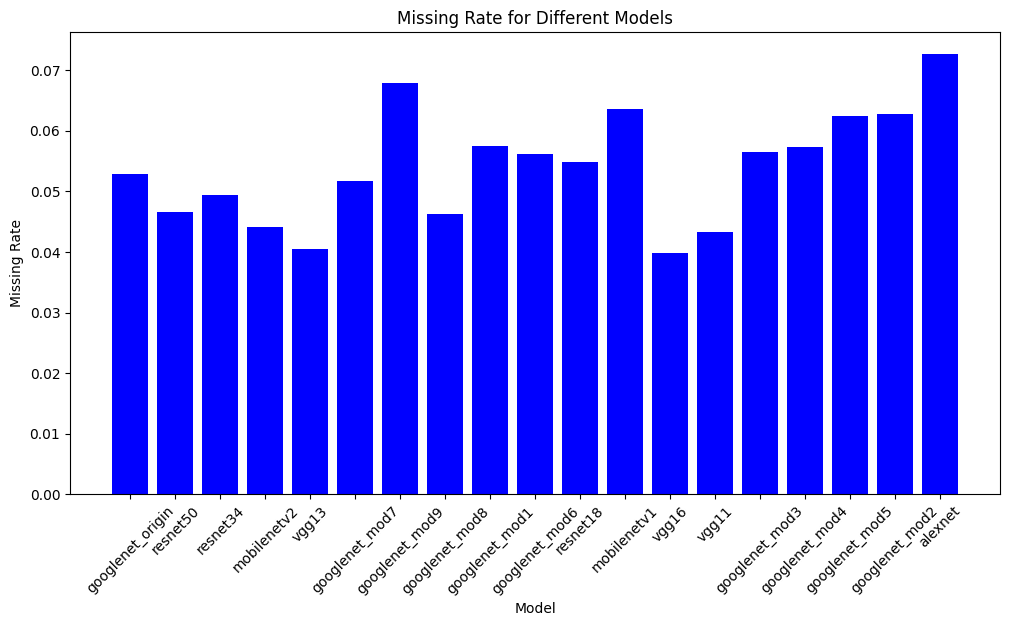

In [ ]:
# plot the missing rate for all the models
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(model_list, missing_rate_list, color='blue')
ax.set_xlabel('Model')
ax.set_ylabel('Missing Rate')
ax.set_title('Missing Rate for Different Models')
plt.xticks(rotation=45)
plt.show()
